- 데이터 출처 : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
- 연령대, 결혼여부, 최종학력, 소득수준 등 다양한 요소를 바탕으로 고객 이탈 예측

# 문제 정의

# 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats


%matplotlib inline

In [2]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [3]:
df = pd.read_csv("/Users/tiffany/Downloads/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Client number
- Unique identifier for the customer holding the account

In [4]:
# Client number. Unique identifier for the customer holding the account
df['CLIENTNUM'].value_counts()

CLIENTNUM
768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: count, Length: 10127, dtype: int64

## Attrition_Flag
- Internal event (customer activity) variable
- if the account is closed then 1 else 0
- 이탈 고객 적음


In [5]:
# Internal event (customer activity) variable - if the account is closed then 1 else 0 : 이탈 고객 적음
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

## Customer's Age in Years

In [6]:
# Demographic variable - Customer's Age in Years
df['Customer_Age'].value_counts().reset_index().sort_values(by='Customer_Age')

,Customer_Age,count
33,26,78
38,27,32
39,28,29
36,29,56
34,30,70
32,31,91
28,32,106
26,33,127
25,34,146
22,35,184


<Axes: >

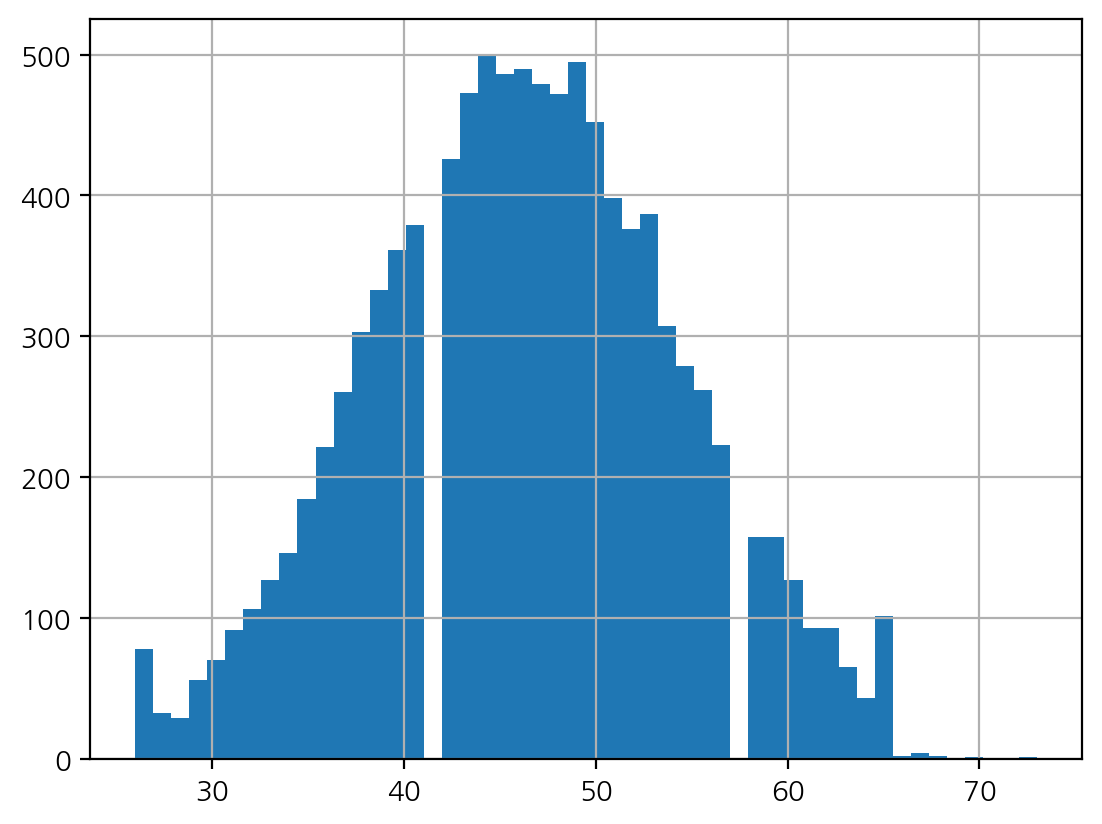

In [7]:
df['Customer_Age'].hist(bins=50)

## Gender
- M=Male, F=Female
- 여자가 좀 더 많네?


In [8]:
# Demographic variable - M=Male, F=Female : 여자가 좀 더 많네?
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

## Number of dependents
- 부양 가족 수


In [9]:
# Demographic variable - Number of dependents : 부양 가족 수
Dependent = df['Dependent_count'].value_counts().reset_index().sort_values(by='Dependent_count')
Dependent

,Dependent_count,count
4,0,904
2,1,1838
1,2,2655
0,3,2732
3,4,1574
5,5,424


<Axes: xlabel='Dependent_count'>

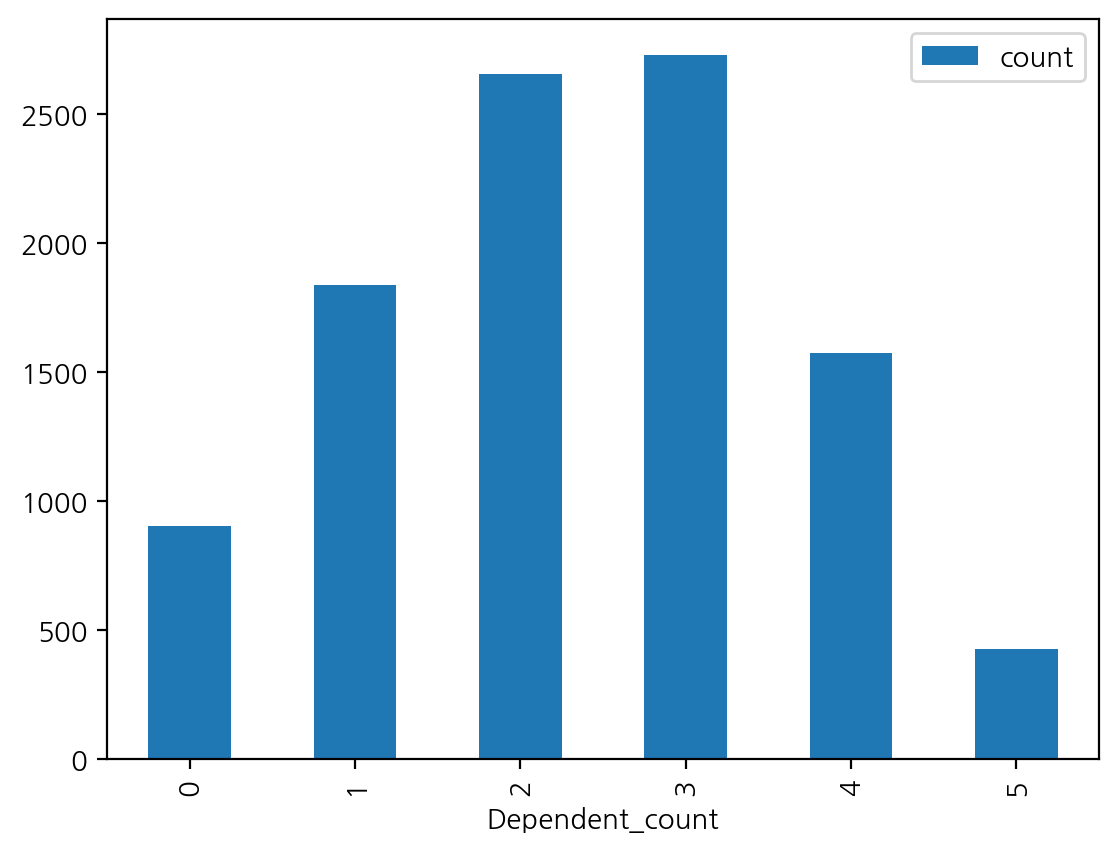

In [10]:
Dependent.plot(kind='bar', x='Dependent_count')

## Education_Level
- Educational Qualification of the account holder


In [11]:
# Demographic variable - Educational Qualification of the account holder
Education = df['Education_Level'].value_counts().reset_index()
Education

,Education_Level,count
0,Graduate,3128
1,High School,2013
2,Unknown,1519
3,Uneducated,1487
4,College,1013
5,Post-Graduate,516
6,Doctorate,451


In [12]:
Education['Education_Level'].unique()

array(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

- 학력 수준 순서대로 나열 -> 숫자로 변경?
    - Unknown
    - Uneducated
    - High School
    - College
    - Graduate
    - Post-Graduate
    - Doctorate

## Marital_Status
- Married, Single, Divorced, Unknown


In [13]:
# Demographic variable - Married, Single, Divorced, Unknown
df['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

## Income_Category
- Annual Income Category of the account holder 

In [14]:
# Annual Income Category of the account holder 
Income = df['Income_Category'].value_counts().reset_index()
Income

,Income_Category,count
0,Less than $40K,3561
1,$40K - $60K,1790
2,$80K - $120K,1535
3,$60K - $80K,1402
4,Unknown,1112
5,$120K +,727


In [15]:
Income['Income_Category'].unique()

array(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       'Unknown', '$120K +'], dtype=object)

<Axes: xlabel='Income_Category', ylabel='count'>

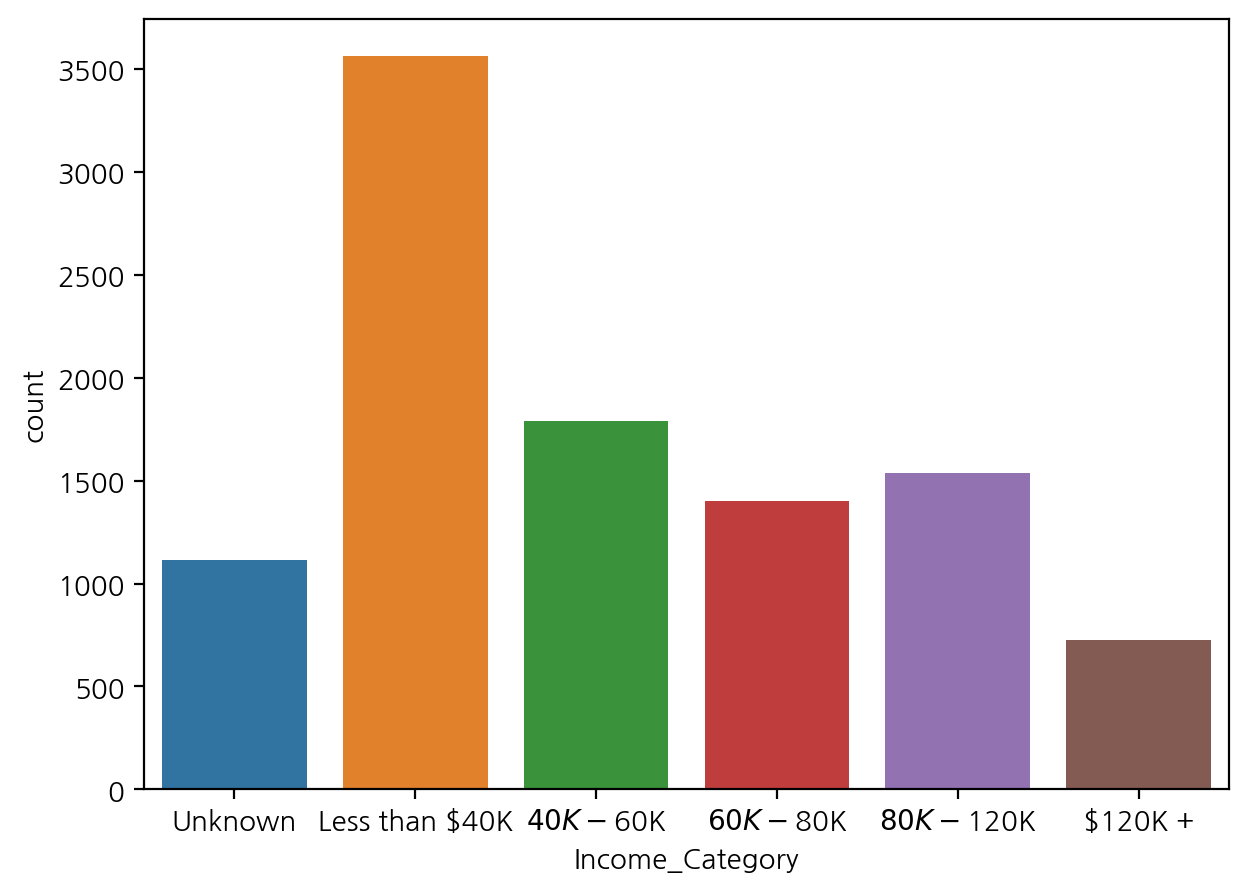

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(data=Income, x='Income_Category', y='count',
            order = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K","$120K +"])

## Card_Category

In [17]:
# Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

## Months_on_book
- Period of relationship with bank

In [18]:
# Period of relationship with bank
df['Months_on_book'].value_counts().reset_index().sort_values(by='Months_on_book').head()

,Months_on_book,count
34,13,70
43,14,16
41,15,34
42,16,29
40,17,39


<Axes: >

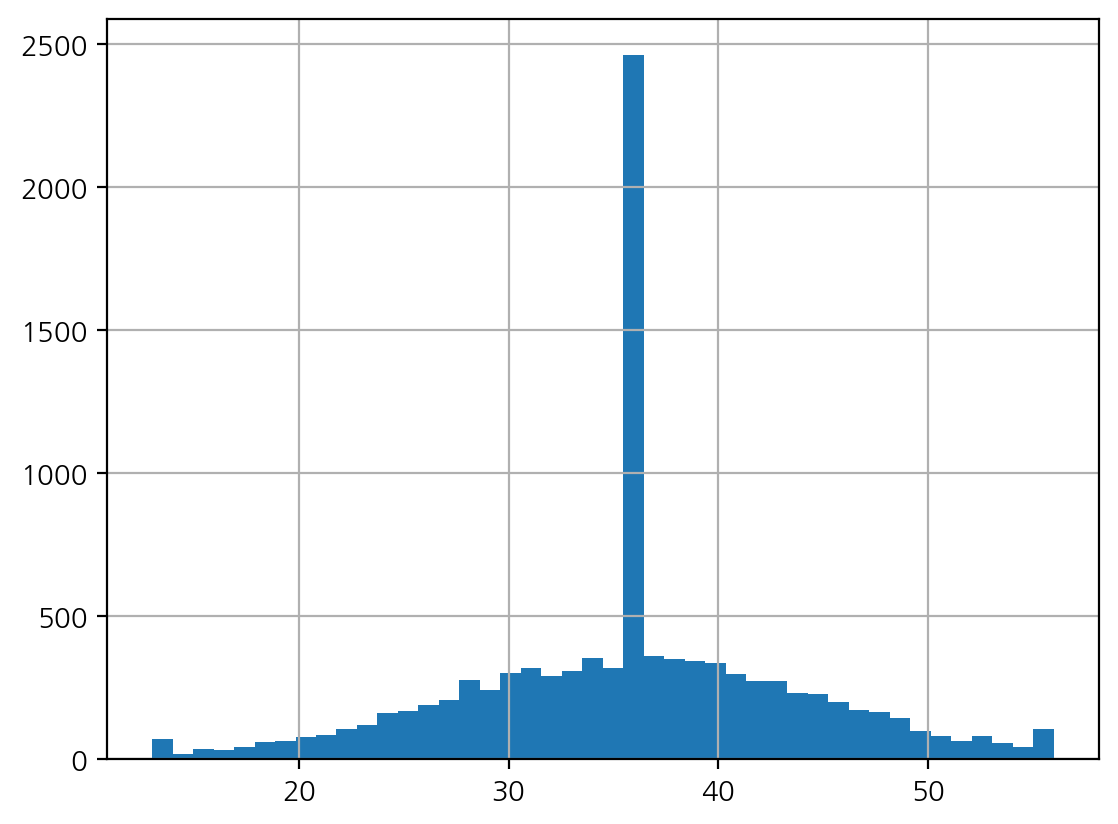

In [19]:
df['Months_on_book'].hist(bins=df['Months_on_book'].nunique())

## Total_Relationship_Count
- Total no. of products held by the customer

In [20]:
df['Total_Relationship_Count'].value_counts()

Total_Relationship_Count
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: count, dtype: int64

<Axes: >

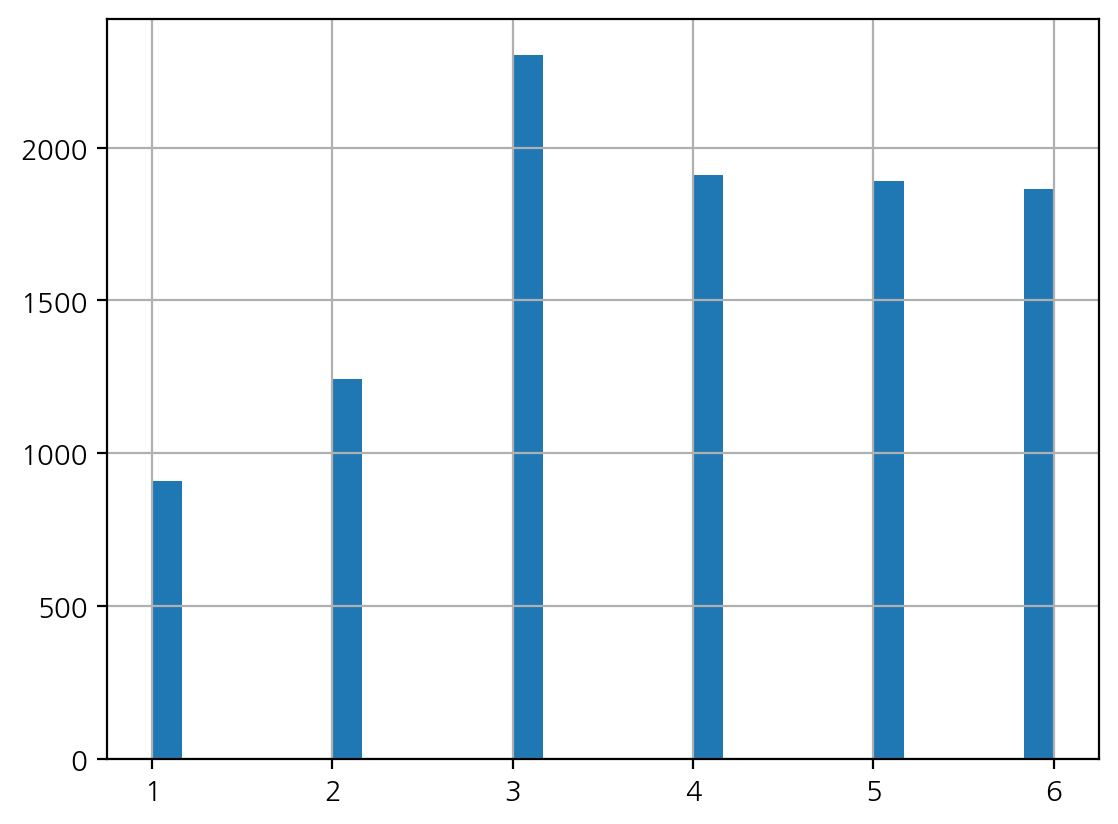

In [21]:
df['Total_Relationship_Count'].hist(bins=30)

## Months_Inactive_12_mon
- No. of months inactive in the last 12 months

Months_Inactive_12_mon
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64


<Axes: >

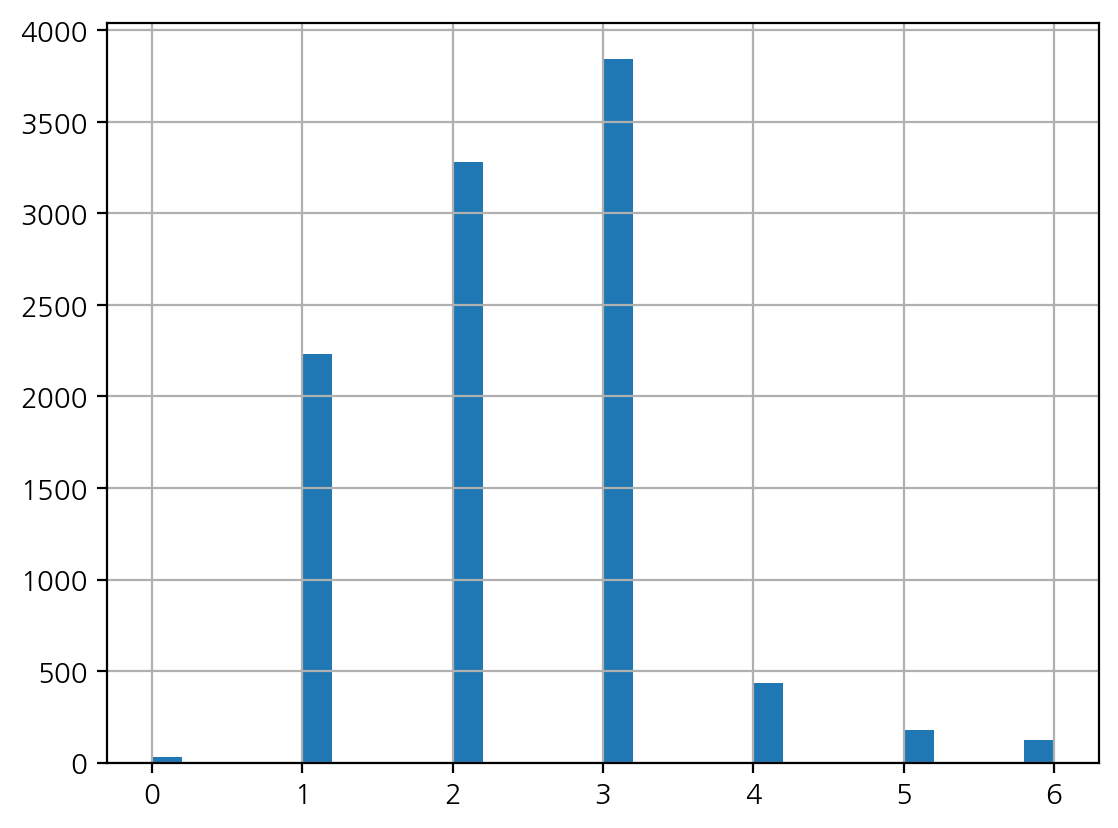

In [22]:
print(df['Months_Inactive_12_mon'].value_counts())
df['Months_Inactive_12_mon'].hist(bins=30)

## Contacts_Count_12_mon
- No. of Contacts in the last 12 months

Contacts_Count_12_mon
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: count, dtype: int64


<Axes: >

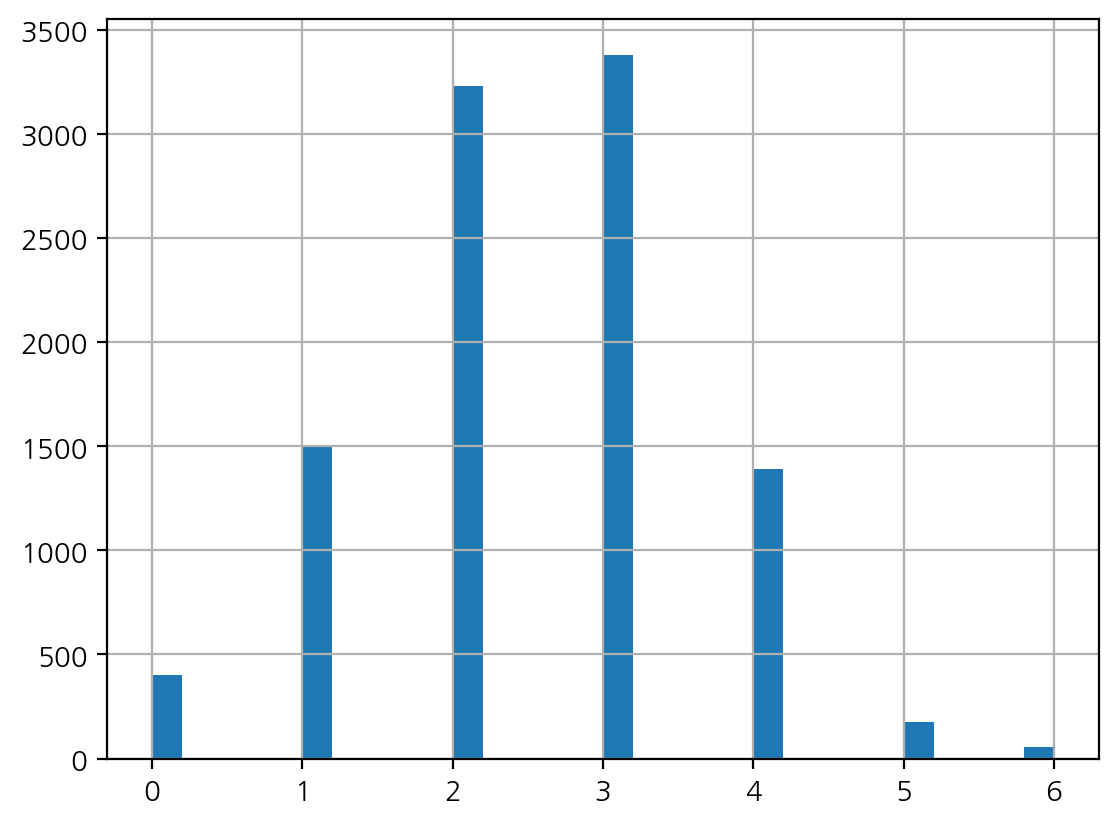

In [23]:
print(df['Contacts_Count_12_mon'].value_counts())
df['Contacts_Count_12_mon'].hist(bins=30)

## Credit_Limit
- Credit Limit on the Credit Card
- 신용한도
- 여기까지 지출할 수 있어!


Credit_Limit
34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: count, Length: 6205, dtype: int64


<Axes: >

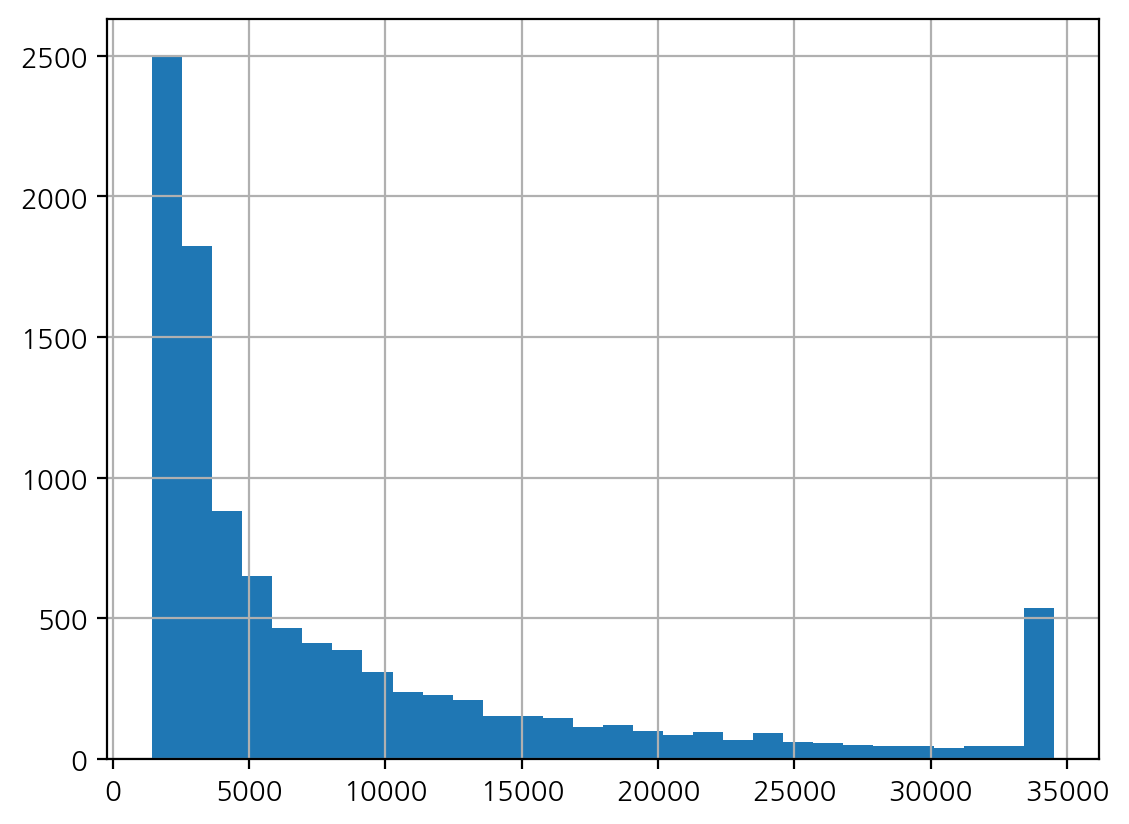

In [24]:
print(df['Credit_Limit'].value_counts())
df['Credit_Limit'].hist(bins=30)

## Total_Revolving_Bal
- Total Revolving Balance on the Credit Card 
- 다음달로 이월되는 잔액

Total_Revolving_Bal
0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: count, Length: 1974, dtype: int64


<Axes: >

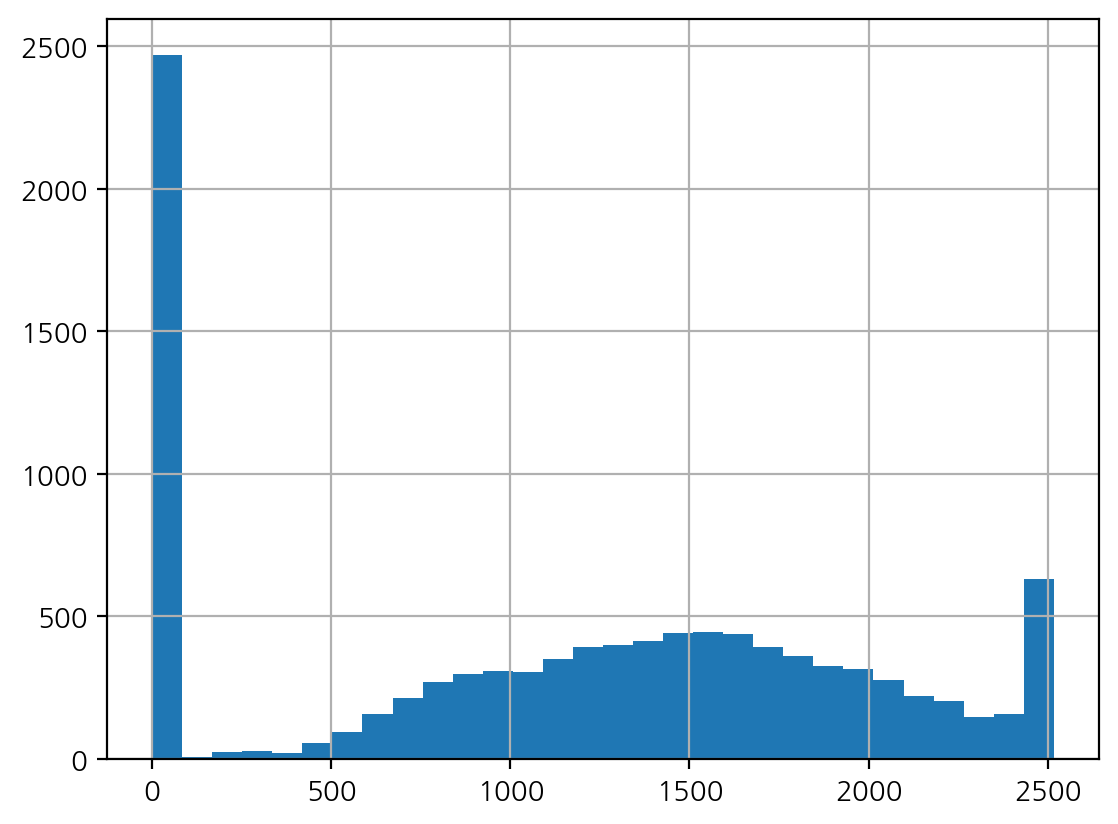

In [25]:
print(df['Total_Revolving_Bal'].value_counts())
df['Total_Revolving_Bal'].hist(bins=30)

## Avg_Open_To_Buy
- Open to Buy Credit Line (Average of last 12 months)
- for any Open Account on any Business Day, the excess of (i) the Credit Limit and (b) the amount of Receivables in such Account.
- 해당 계정의 신용 한도 및 미수금 금액 초과 -> 그래서 한도초과한 금액이 적은 게 많겠지

Avg_Open_To_Buy
1438.3     324
34516.0     98
31999.0     26
787.0        8
701.0        7
          ... 
6543.0       1
2808.0       1
21549.0      1
6189.0       1
8427.0       1
Name: count, Length: 6813, dtype: int64


<Axes: >

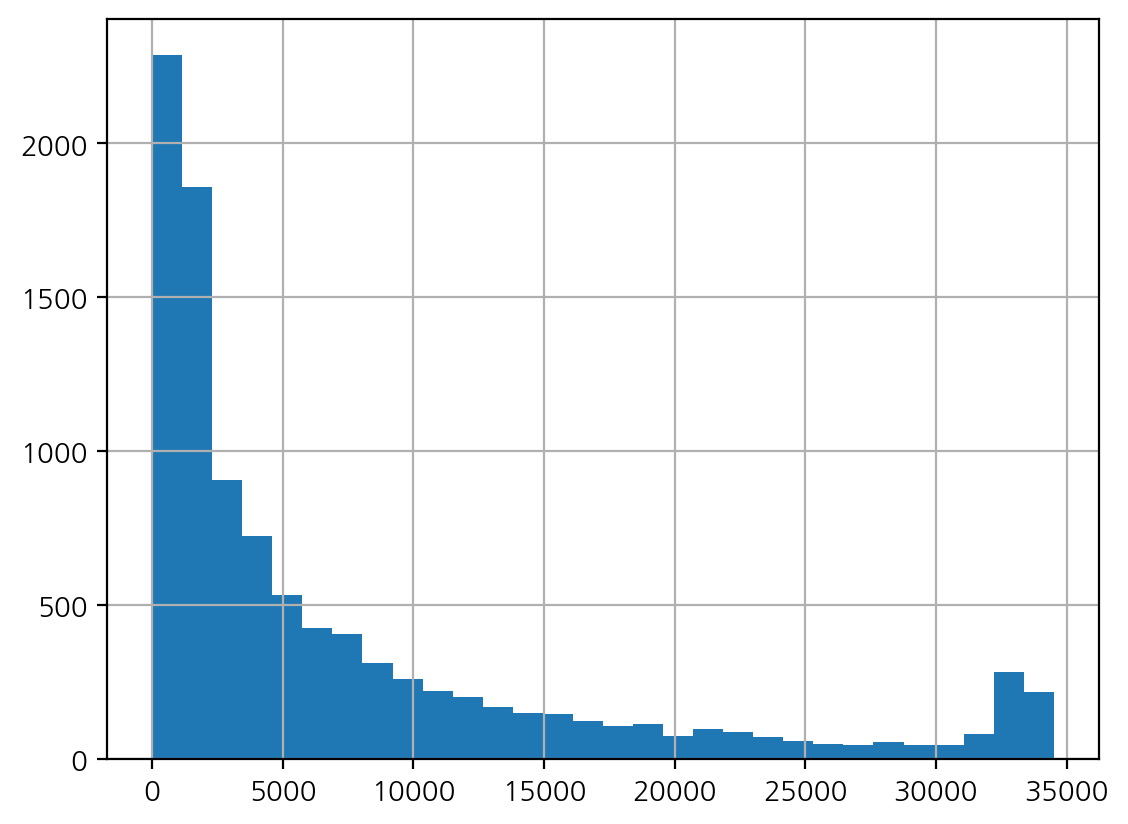

In [26]:
print(df['Avg_Open_To_Buy'].value_counts())
df['Avg_Open_To_Buy'].hist(bins=30)

## Total_Amt_Chng_Q4_Q1
- Change in Transaction Amount (Q4 over Q1)
- 거래금액 변동(1분기 대비 4분기)



Total_Amt_Chng_Q4_Q1
0.791    36
0.712    34
0.743    34
0.718    33
0.735    33
         ..
1.216     1
1.645     1
1.089     1
2.103     1
0.166     1
Name: count, Length: 1158, dtype: int64


<Axes: >

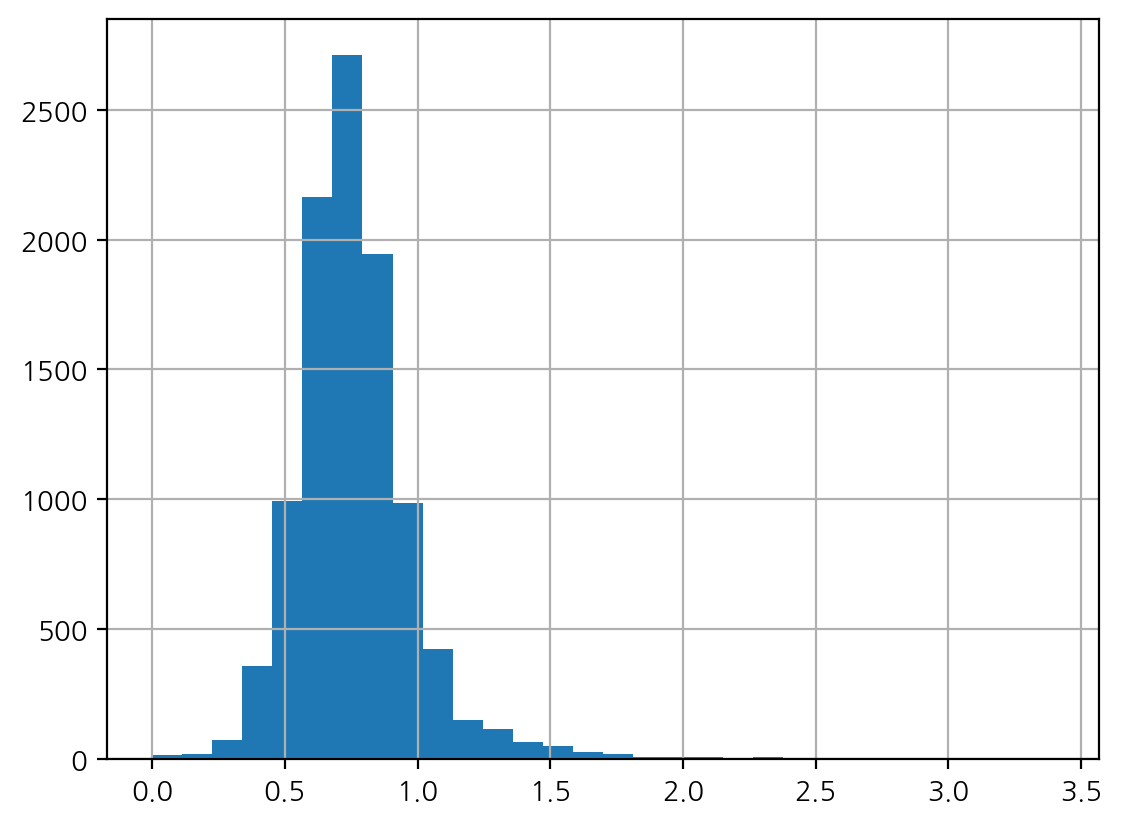

In [27]:
# 전반적으로 거래금액이 줄은 것 같아
print(df['Total_Amt_Chng_Q4_Q1'].value_counts())
df['Total_Amt_Chng_Q4_Q1'].hist(bins=30)

## Total_Trans_Amt
- Total Transaction Amount (Last 12 months)

Total_Trans_Amt
4253     11
4509     11
4518     10
2229     10
4220      9
         ..
1274      1
4521      1
3231      1
4394      1
10294     1
Name: count, Length: 5033, dtype: int64


<Axes: >

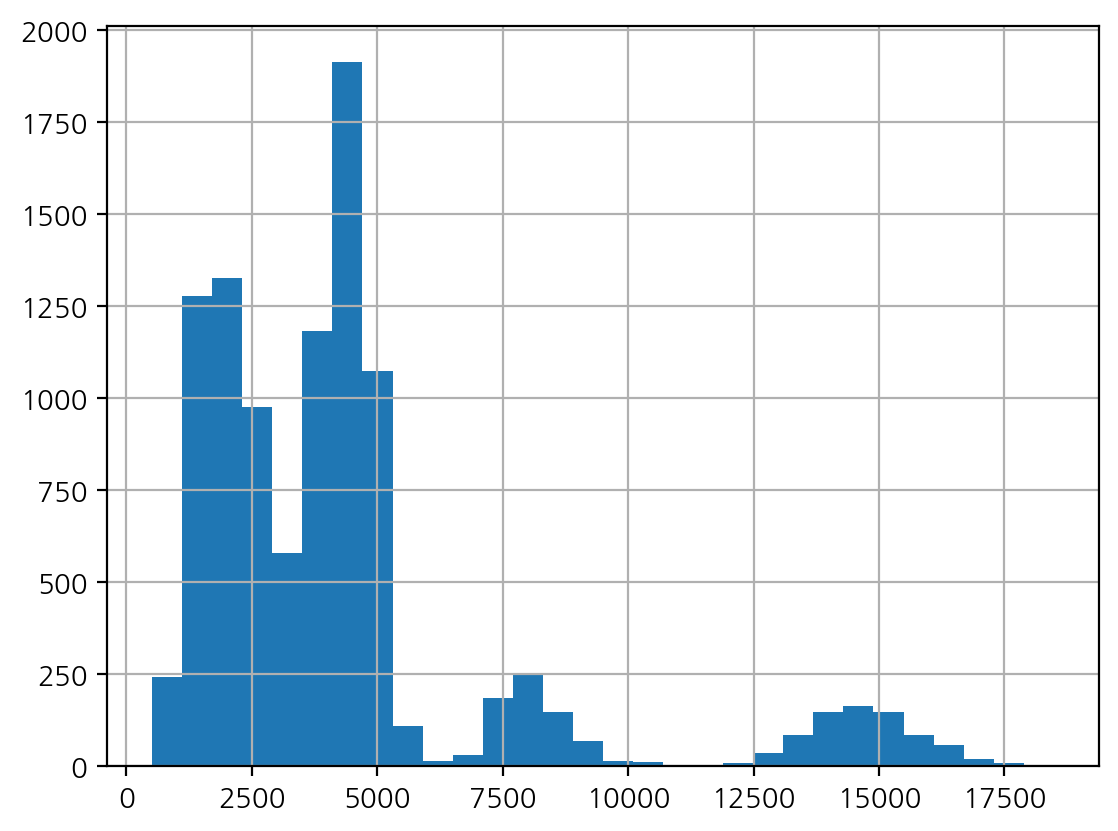

In [28]:
# 지난 1년간 거래 양
print(df['Total_Trans_Amt'].value_counts())
df['Total_Trans_Amt'].hist(bins=30)

## Total_Trans_Ct
- Total Transaction Count (Last 12 months)

Total_Trans_Ct
81     208
71     203
75     203
69     202
82     202
      ... 
11       2
134      1
139      1
138      1
132      1
Name: count, Length: 126, dtype: int64


<Axes: >

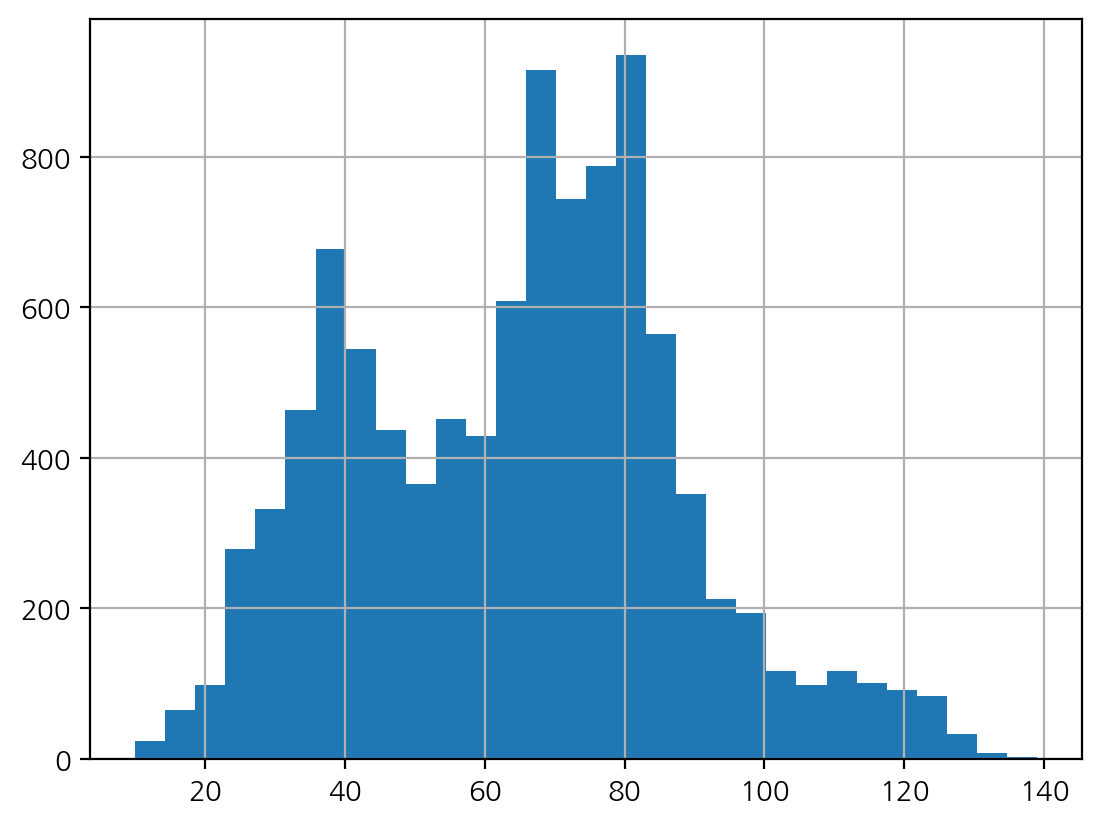

In [29]:
# 지난 1년간 거래 양
print(df['Total_Trans_Ct'].value_counts())
df['Total_Trans_Ct'].hist(bins=30)

## Total_Ct_Chng_Q4_Q1
- Change in Transaction Count (Q4 over Q1)

Total_Ct_Chng_Q4_Q1
0.667    171
1.000    166
0.500    161
0.750    156
0.600    113
        ... 
0.827      1
0.343      1
1.579      1
0.125      1
0.359      1
Name: count, Length: 830, dtype: int64


<Axes: >

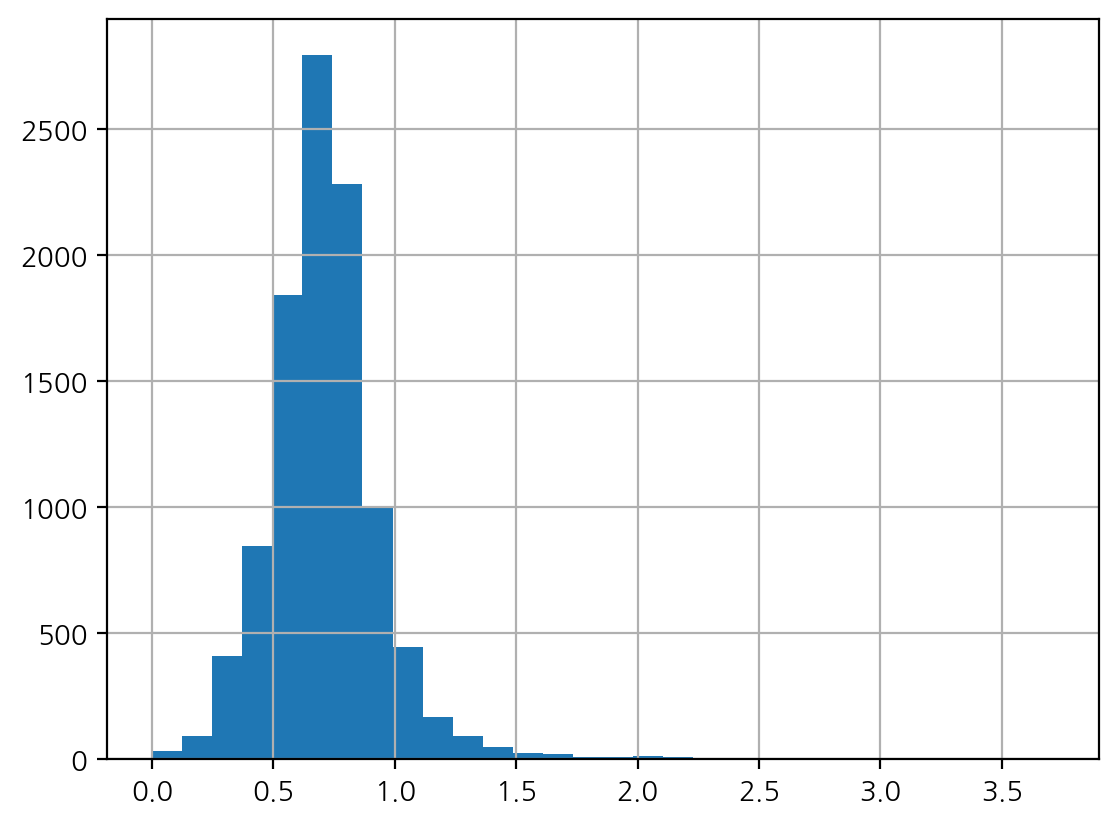

In [30]:
# 지난 1년간 거래 양
print(df['Total_Ct_Chng_Q4_Q1'].value_counts())
df['Total_Ct_Chng_Q4_Q1'].hist(bins=30)

## Avg_Utilization_Ratio
- Average Card Utilization Ratio
- Credit utilization is calculated by dividing the balance by credit limit for each card and for all cards together.
- 신용이용률은 잔액을 카드별, 전체 카드별 신용한도로 나누어 계산합니다.

- 잔액을 신용한도로 나누는 것은 "신용 이용률"을 계산하는 과정입니다. 신용 이용률은 카드 사용자가 현재 카드의 얼마나를 사용하고 있는지를 백분율로 표현한 값입니다.

수학적으로는 다음과 같이 나타낼 수 있습니다:

- 신용 이용률

(
현재 잔액
신용 한도
)
×
100
신용 이용률=( 
신용 한도
현재 잔액
​
 )×100

여기서:

"현재 잔액"은 카드 사용자가 현재 갖고 있는 빚이나 결제되지 않은 금액을 나타냅니다.
"신용 한도"는 카드 회사가 카드 사용자에게 부여한 최대 신용 금액을 나타냅니다.
이 값을 100으로 곱하면 백분율로 나타낼 수 있습니다. 이 값이 낮을수록 카드 사용자가 제공받은 신용 중 현재 사용 중인 비율이 낮다는 것을 의미하며, 높을수록 높은 비율로 신용이 사용 중이라는 것을 나타냅니다. 일반적으로 신용 이용률이 낮을수록 금융 상태를 평가하는 데 도움이 될 수 있습니다.

Avg_Utilization_Ratio
0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.927       1
0.935       1
0.954       1
0.385       1
0.009       1
Name: count, Length: 964, dtype: int64


<Axes: >

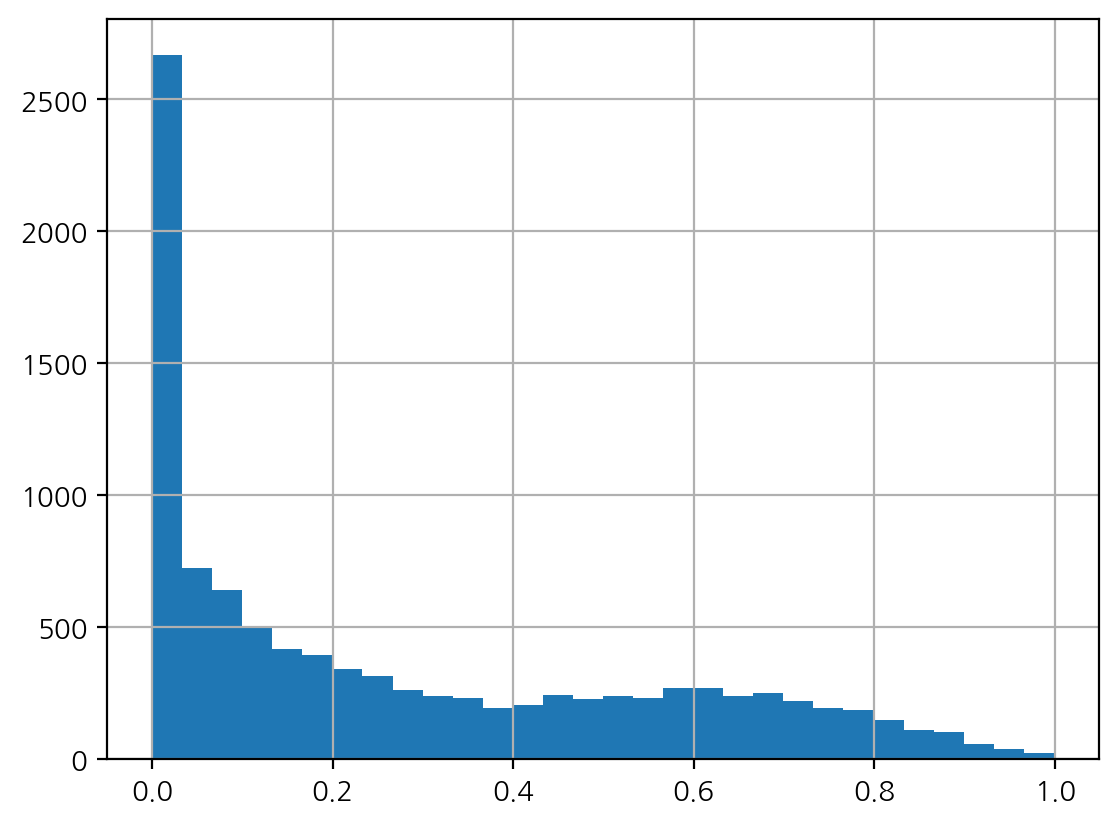

In [31]:
print(df['Avg_Utilization_Ratio'].value_counts())
df['Avg_Utilization_Ratio'].hist(bins=30)

## Naive_Bayes_Classifier_Attrition ~
```
"Naive Bayes Classifier"를 사용하여 
"Attrition_Flag", "Card_Category", "Contacts_Count_12_mon", "Dependent_count", "Education_Level", "Months_Inactive_12_mon" 등의 특성을 이용한 분류 작업을 수행한다는 것으로 이해하겠습니다.

나이브 베이즈 분류기는 각 특성이 독립적이라고 가정하고, 
주어진 입력에 대한 클래스의 조건부 확률을 계산하여 예측을 수행하는 모델입니다. 
이 모델은 텍스트 분류, 스팸 필터링, 감정 분석, 간단한 분류 작업 등 다양한 분야에서 사용됩니다.

위에서 언급한 특성들은 고객 이탈 여부(Attrition_Flag), 카드 카테고리(Card_Category), 연간 연락 횟수(Contacts_Count_12_mon), 부양 가족 수(Dependent_count), 교육 수준(Education_Level), 12개월 동안 비활성 기간(Months_Inactive_12_mon) 등으로 보입니다.
```

# Naive_Bayes 컬럼 삭제

In [32]:
drop_col = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
             
df = df.drop(columns=drop_col)

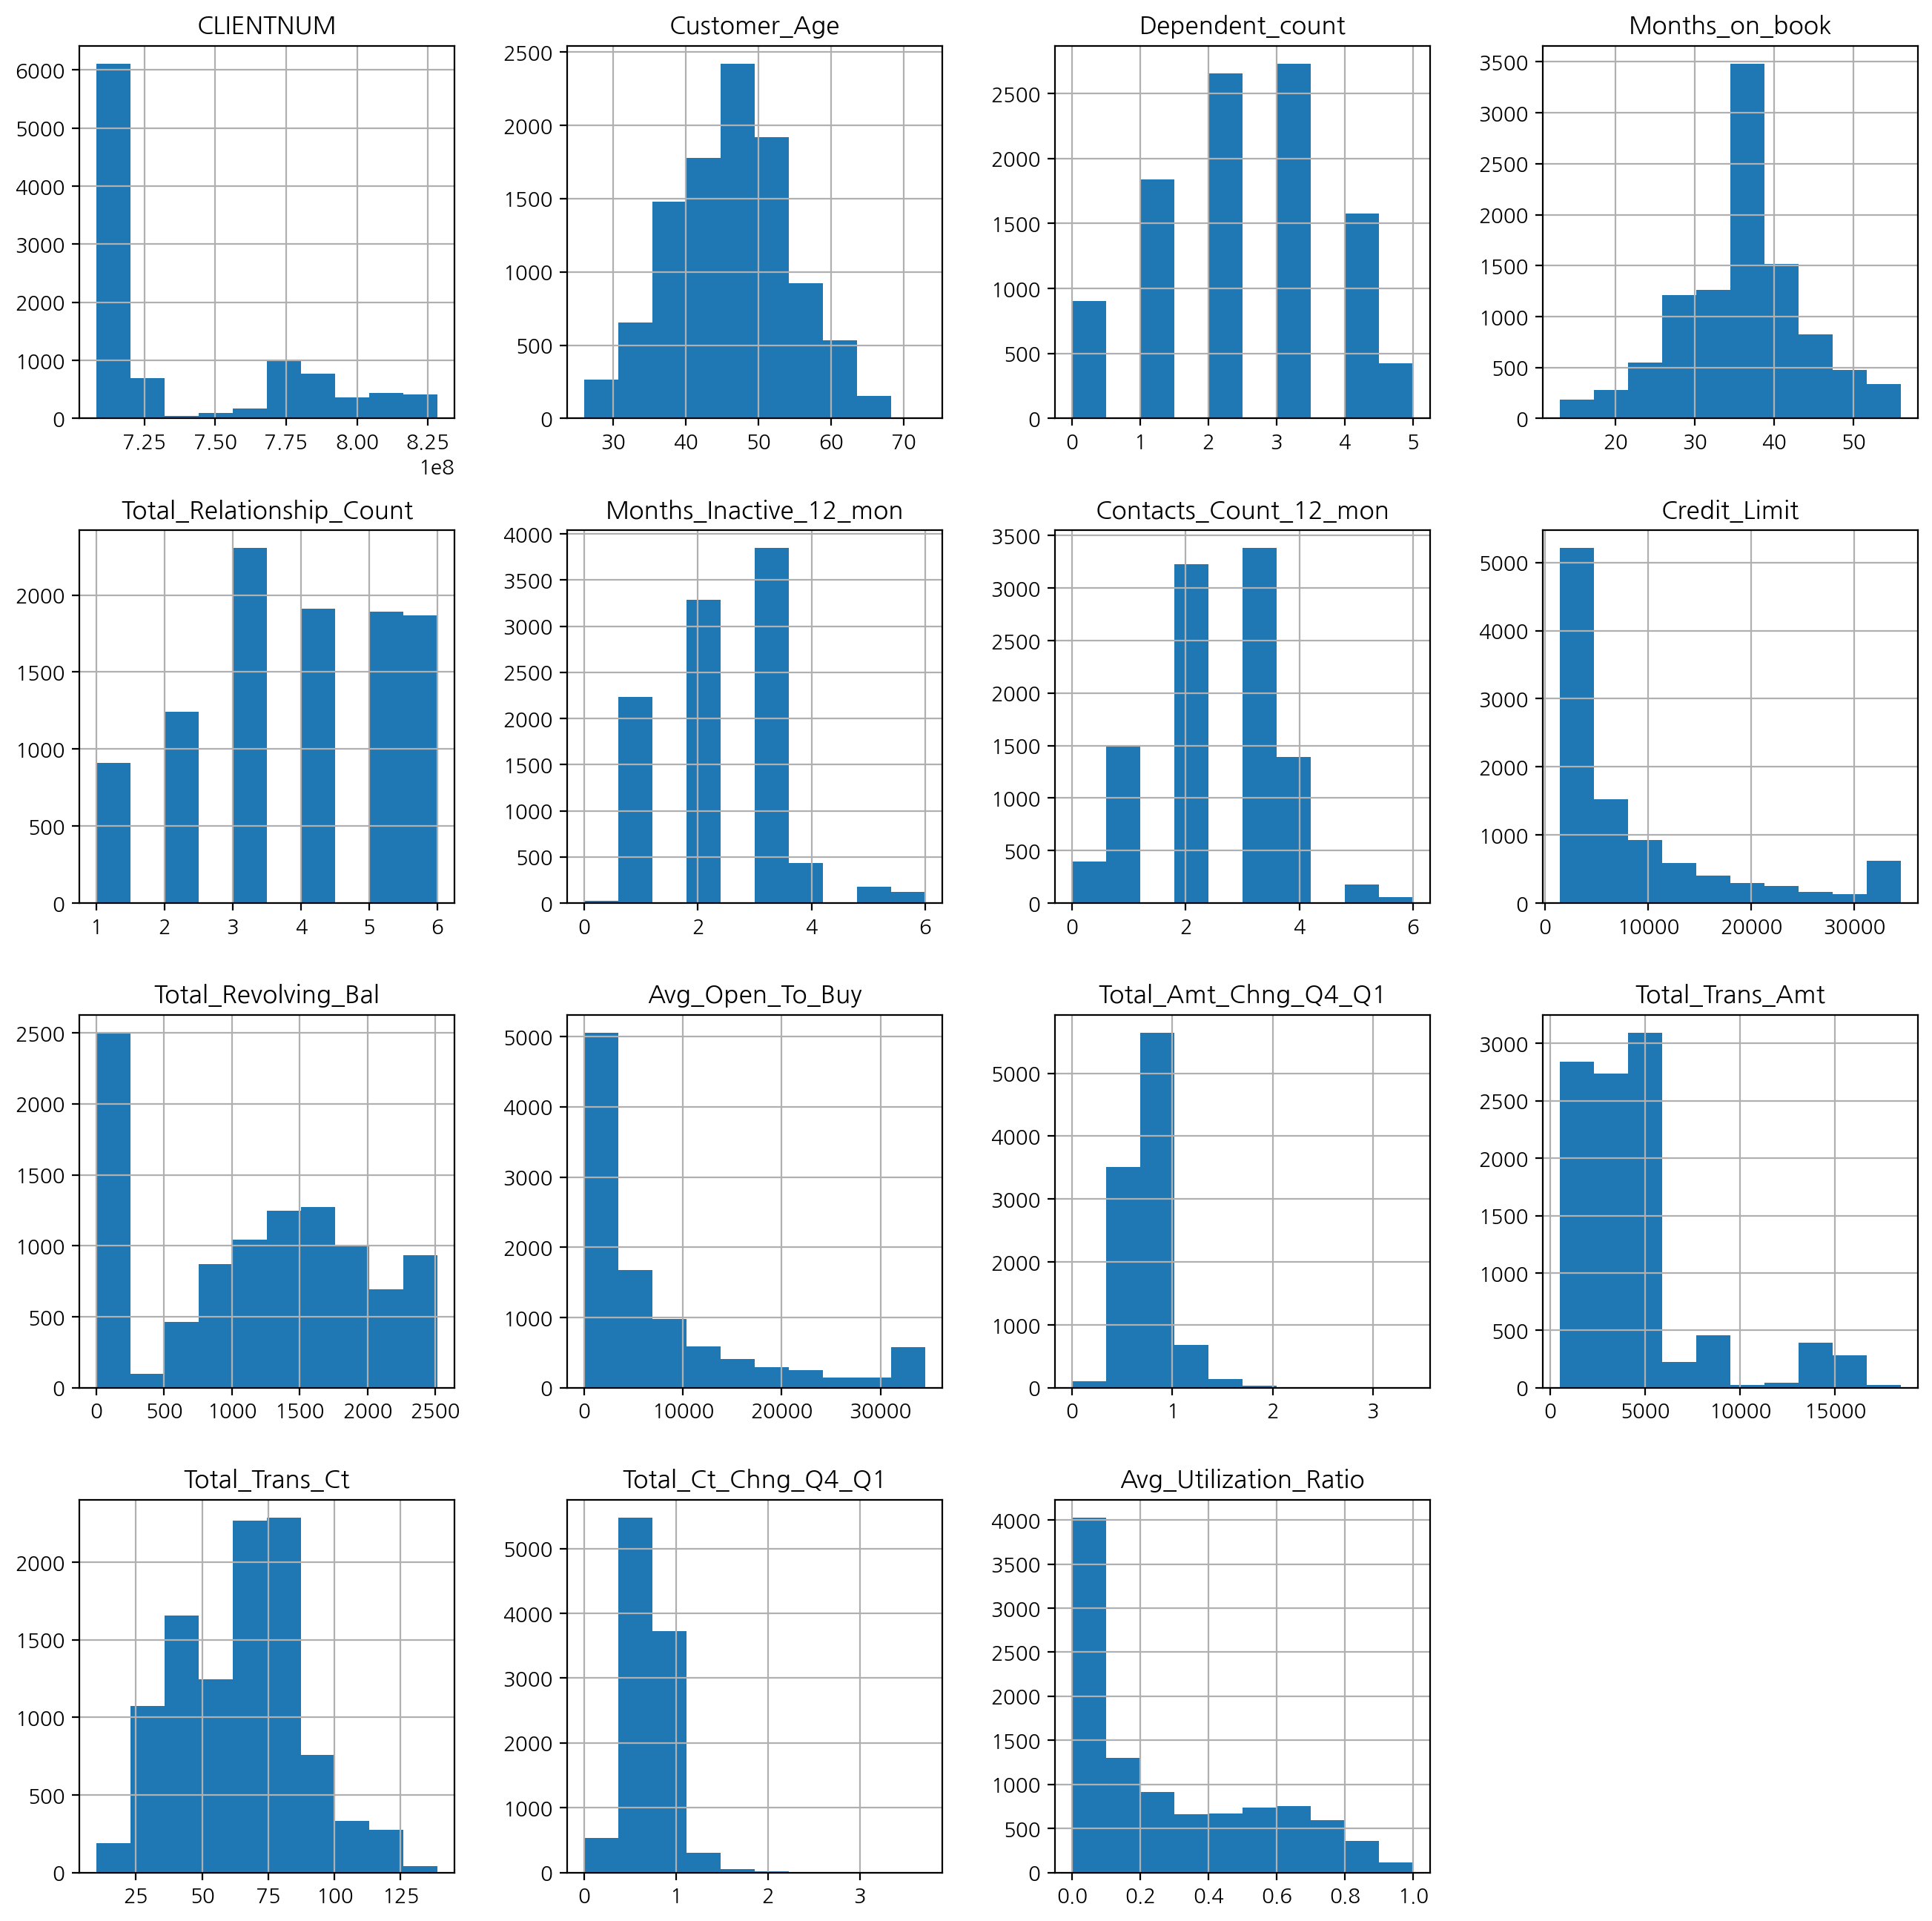

In [33]:
_ = df.hist(figsize=(16,16))

In [34]:
df.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4124,755593983,Existing Customer,50,F,1,Graduate,Married,Unknown,Blue,43,...,1,2,7985.0,0,7985.0,1.032,3873,72,0.674,0.0


# 상관관계 구하기

## 나이 -> 연령대로 변경

In [35]:
def ageCal(age):
    if age < 30 :
        return '20대'
    elif age < 40 :
        return '30대'
    elif age < 50 :
        return '40대'
    elif age < 60 :
        return '50대'
    elif age < 70 :
        return '60대'
    elif age < 80 :
        return '70대'

In [36]:
# '연령대' 컬럼 추가
df['ageCal'] = df['Customer_Age'].apply(ageCal)
df['ageCal']

0        40대
1        40대
2        50대
3        40대
4        40대
        ... 
10122    50대
10123    40대
10124    40대
10125    30대
10126    40대
Name: ageCal, Length: 10127, dtype: object

- 카드 비활성화, t검정, 

## 컬럼 명 변경

In [37]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'ageCal'],
      dtype='object')

In [38]:
new_columns = {'CLIENTNUM' : 'mid',
               'Attrition_Flag' : '이탈여부',
               'Customer_Age' : '나이', 
               'Gender' : '성별',       
               'Dependent_count' : '부양가족수', 
               'Education_Level' : '교육수준', 
               'Marital_Status' : '결혼여부',
               'Income_Category' : '수입',
               'Card_Category' : '카드카테고리', 
               'Months_on_book' : '총거래월수',
               'Total_Relationship_Count' : '상품구매횟수', 
               'Months_Inactive_12_mon' : '비활성화_월수',
               'Contacts_Count_12_mon' : '컨택트횟수', 
               'Credit_Limit' : '신용한도', 
               'Total_Revolving_Bal' : '다음달_이월잔액',
               'Avg_Open_To_Buy' : '평균_사용가능_신용한도', 
               'Total_Amt_Chng_Q4_Q1' : '거래금액 변동(1분기_대비_4분기)', 
               'Total_Trans_Amt' : '1년간_거래양',
               'Total_Trans_Ct' : '1년간_거래횟수', 
               'Total_Ct_Chng_Q4_Q1' : '거래 횟수의 변동량(1분기_대비_4분기)', 
               'Avg_Utilization_Ratio' : '신용 이용률',
               'ageCal' : '연령대'}
df.rename(columns=new_columns, inplace=True)

In [39]:
df

,mid,이탈여부,나이,성별,부양가족수,교육수준,결혼여부,수입,카드카테고리,총거래월수,...,컨택트횟수,신용한도,다음달_이월잔액,평균_사용가능_신용한도,거래금액 변동(1분기_대비_4분기),1년간_거래양,1년간_거래횟수,거래 횟수의 변동량(1분기_대비_4분기),신용 이용률,연령대
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,50대
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,40대
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40대
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,30대


In [40]:
# # Label Encoding을 위한 함수 정의
# def label_encode_column(column):
#     le = LabelEncoder()
#     return le.fit_transform(column)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mid                     10127 non-null  int64  
 1   이탈여부                    10127 non-null  object 
 2   나이                      10127 non-null  int64  
 3   성별                      10127 non-null  object 
 4   부양가족수                   10127 non-null  int64  
 5   교육수준                    10127 non-null  object 
 6   결혼여부                    10127 non-null  object 
 7   수입                      10127 non-null  object 
 8   카드카테고리                  10127 non-null  object 
 9   총거래월수                   10127 non-null  int64  
 10  상품구매횟수                  10127 non-null  int64  
 11  비활성화_월수                 10127 non-null  int64  
 12  컨택트횟수                   10127 non-null  int64  
 13  신용한도                    10127 non-null  float64
 14  다음달_이월잔액                10127 non-null

In [42]:
# # 여러 컬럼에 대해 Label Encoding 수행
# columns_to_encode = ['Attrition_Flag', 'Gender', 
#                      'Card_Category', 'Education_Level', 'Income_Category', 'Marital_Status']

# for column in columns_to_encode:
#     df[column] = label_encode_column(df[column])

In [43]:
df

,mid,이탈여부,나이,성별,부양가족수,교육수준,결혼여부,수입,카드카테고리,총거래월수,...,컨택트횟수,신용한도,다음달_이월잔액,평균_사용가능_신용한도,거래금액 변동(1분기_대비_4분기),1년간_거래양,1년간_거래횟수,거래 횟수의 변동량(1분기_대비_4분기),신용 이용률,연령대
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,50대
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,40대
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40대
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,30대


## Label Encoding
- 레이블 인코딩은 범주형 데이터를 수치형으로 변환하는 방법
- 여러 범주(라벨)가 있는 컬럼에서 각 범주를 고유한 정수로 매핑하는 것이 핵심 아이디어

- 아래 코드에서 fit_transform 메서드는 레이블 인코딩을 수행
    - 인코딩된 값은 classes_ 속성에서 확인 가능
    - 이 코드에서는 'Category A'가 0, 'Category B'가 1, 'Category C'가 2로 인코딩

In [44]:
from sklearn.preprocessing import LabelEncoder

# 예시 데이터
data = ['Category A', 'Category B', 'Category C', 'Category A']

# LabelEncoder 객체 생성
le = LabelEncoder()

# 데이터에 대해 fit 및 transform 수행
encoded_data = le.fit_transform(data)

# 결과 출력
print("Original Data:", data)
print("Encoded Data:", encoded_data)


Original Data: ['Category A', 'Category B', 'Category C', 'Category A']
Encoded Data: [0 1 2 0]


In [45]:
temp = df.copy()

In [46]:
# Label Encoding을 위한 함수 정의
def label_encode_column(column):
    le = LabelEncoder()
    encoded_column = le.fit_transform(column)
    encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return encoded_column, encoding_mapping

# 여러 컬럼에 대해 Label Encoding 수행
columns_to_encode = ['부양가족수', '성별', '연령대', '이탈여부',
                     '카드카테고리', '교육수준', '수입', '결혼여부']

encoded_mapping_dict = {}
for column in columns_to_encode:
    temp[column], encoding_mapping = label_encode_column(temp[column])
    encoded_mapping_dict[column] = encoding_mapping

# 결과 출력
print("\n인코딩된 값 매핑:")
for column, mapping in encoded_mapping_dict.items():
    print(f"{column}: {mapping}\n")



인코딩된 값 매핑:
부양가족수: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

성별: {'F': 0, 'M': 1}

연령대: {'20대': 0, '30대': 1, '40대': 2, '50대': 3, '60대': 4, '70대': 5}

이탈여부: {'Attrited Customer': 0, 'Existing Customer': 1}

카드카테고리: {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}

교육수준: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}

수입: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}

결혼여부: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}



## 상관관계 구하기

In [47]:
# 상관관계 행렬 구하기
correlation_matrix = temp.corr()

<Axes: >

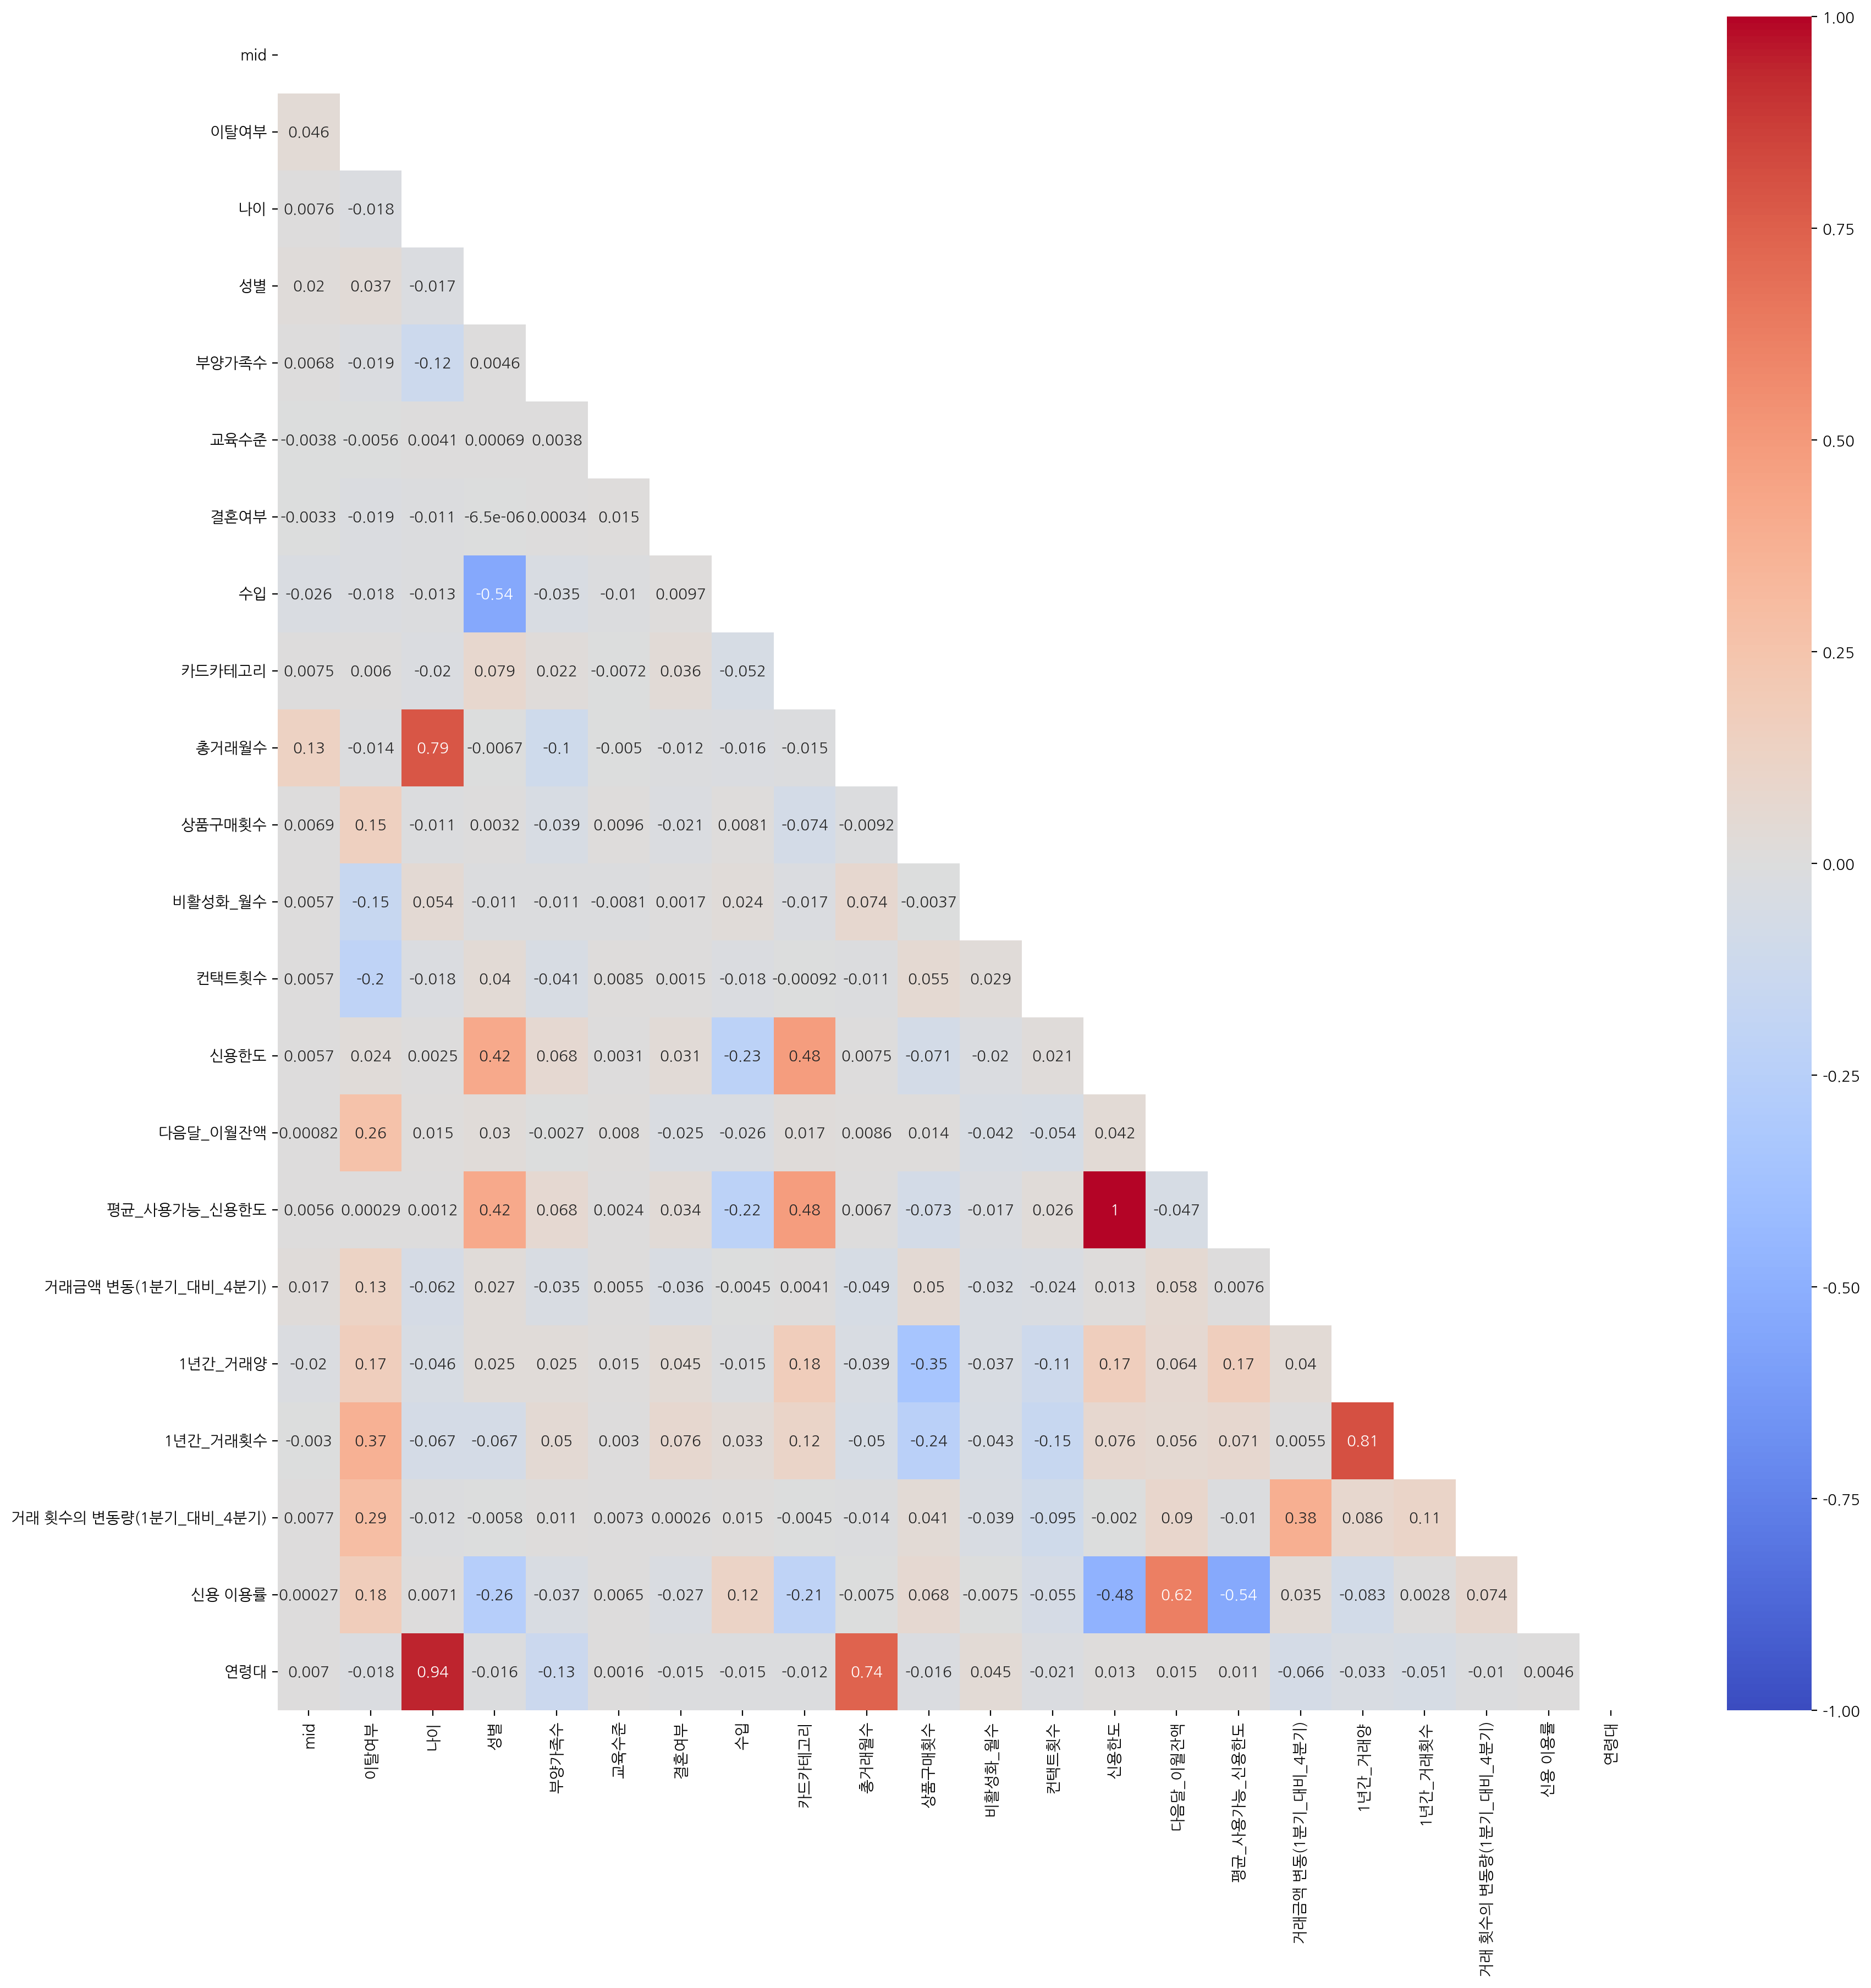

In [48]:
# 히트맵 : 상관관계 높게나온건 나이와 총 거래월수, 성별이랑 신용한도, 성별이랑 수입, 1년간 거래량이랑 거래횟수 등이 있다.
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

In [49]:
df.columns

Index(['mid', '이탈여부', '나이', '성별', '부양가족수', '교육수준', '결혼여부', '수입', '카드카테고리',
       '총거래월수', '상품구매횟수', '비활성화_월수', '컨택트횟수', '신용한도', '다음달_이월잔액',
       '평균_사용가능_신용한도', '거래금액 변동(1분기_대비_4분기)', '1년간_거래양', '1년간_거래횟수',
       '거래 횟수의 변동량(1분기_대비_4분기)', '신용 이용률', '연령대'],
      dtype='object')

In [50]:
df.head()

,mid,이탈여부,나이,성별,부양가족수,교육수준,결혼여부,수입,카드카테고리,총거래월수,...,컨택트횟수,신용한도,다음달_이월잔액,평균_사용가능_신용한도,거래금액 변동(1분기_대비_4분기),1년간_거래양,1년간_거래횟수,거래 횟수의 변동량(1분기_대비_4분기),신용 이용률,연령대
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대


# 나이와 총 거래월수

<Axes: xlabel='연령대', ylabel='총거래월수'>

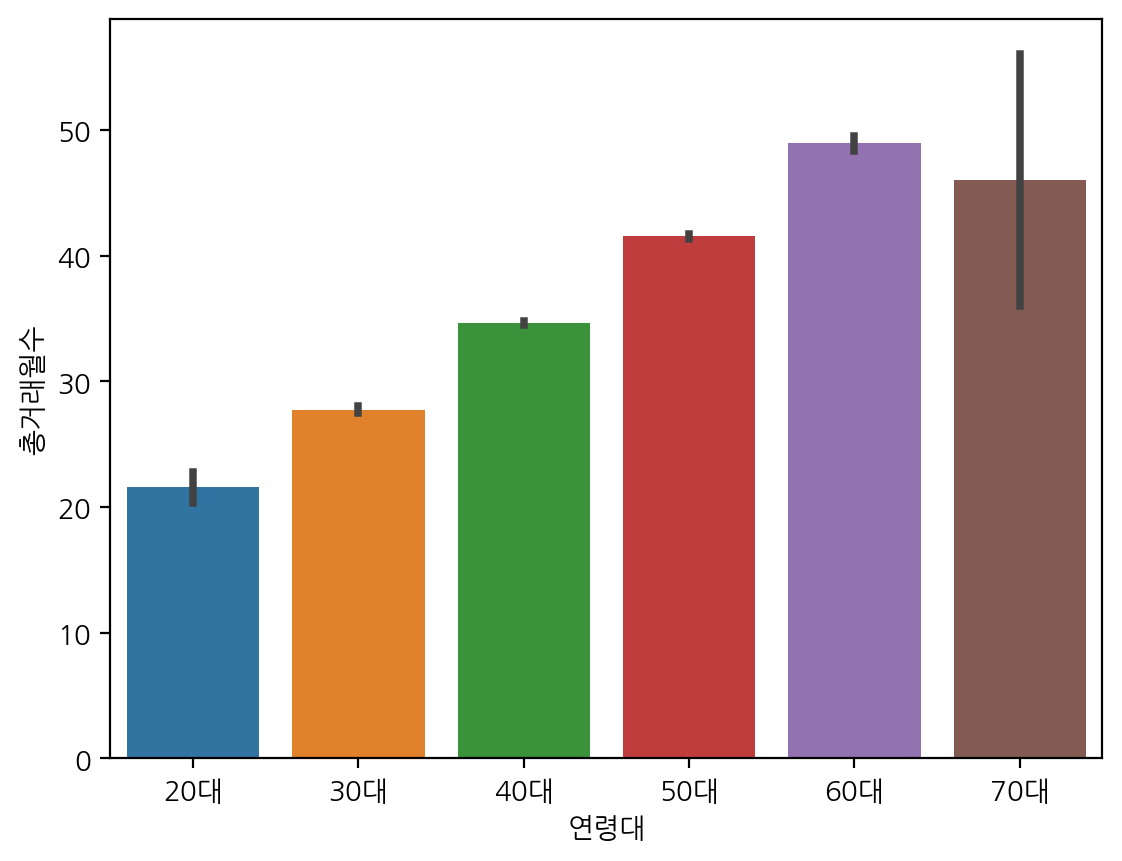

In [51]:
# 연령대 별 총 거래월 수 평균
sns.barplot(x='연령대', y='총거래월수', data=df, 
            order = ["20대","30대","40대","50대","60대","70대"], 
            estimator='mean'
)


- 20대는 1분위수와 3사분위수 차이가 가장 크다
- 20~30대의 총거래월수 최소 최대는 거의 동일해보임
    - 20대는 그렇다쳐도 
    - 30대 중에도 신규 유저로 유입될 가능성이 높다는 것
    - 상대적으로 60~70대의 최소 총 거래월수는 30개월 이상임. 모든 60~70대는 적어도 2.5년 이상했다는 것. 평균적으로는 4년 이상 거래 고객
- 40대에는 이상치가 많음

<Axes: xlabel='연령대', ylabel='총거래월수'>

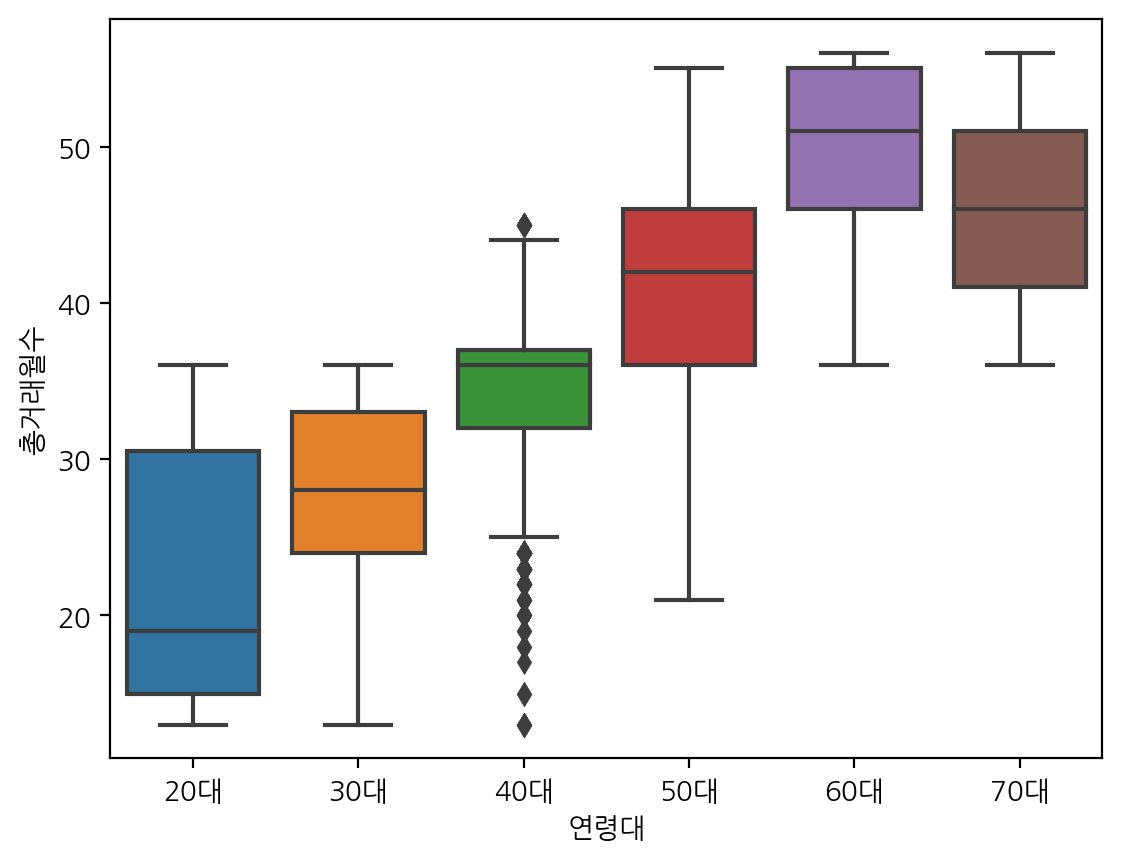

In [52]:
# 연령대 별 총거래월수 박스플랏
sns.boxplot(x='연령대', y='총거래월수', data=df, 
            order = ["20대","30대","40대","50대","60대","70대"]
)

# 성별과 신용한도

<Axes: xlabel='성별', ylabel='신용한도'>

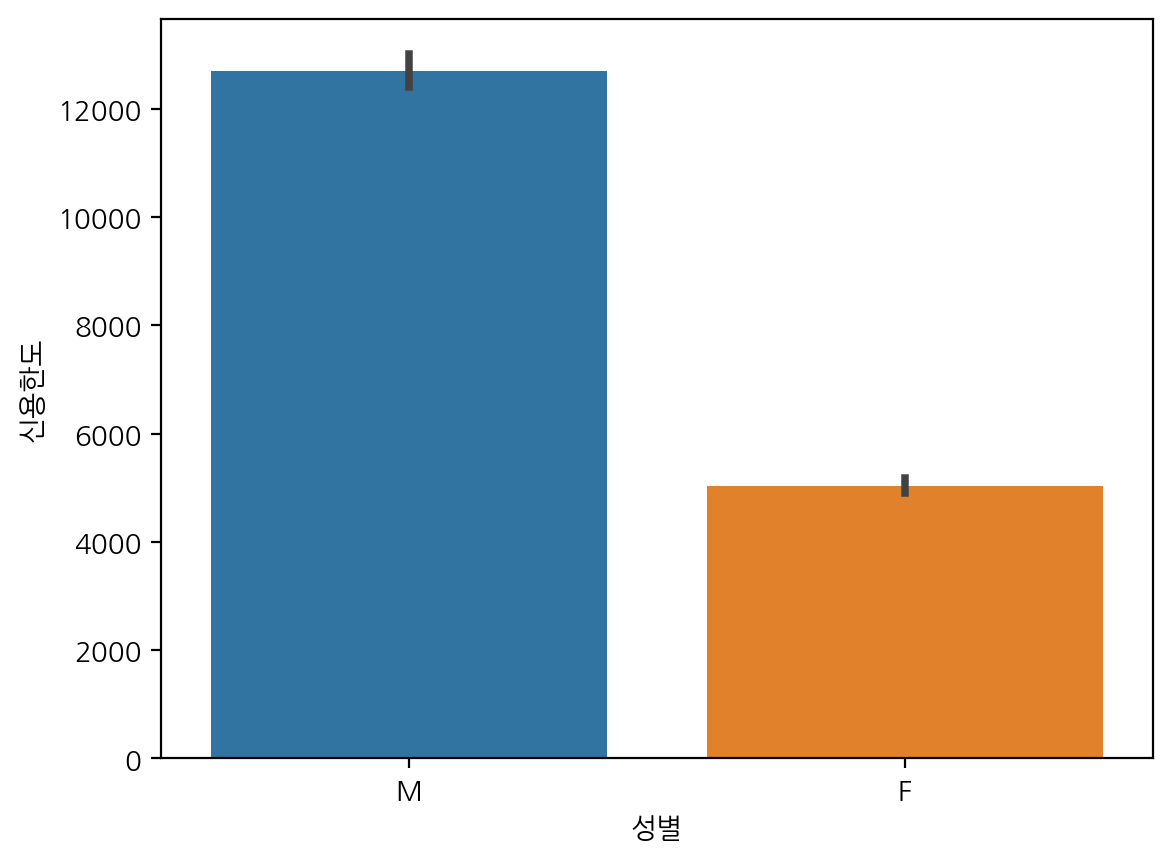

In [53]:
# 성별 별 신용한도 평균
sns.barplot(x='성별', y='신용한도', data=df, 
            estimator='mean'
)

- 남자의 신용한도 평균이 여자의 신용한도 평균보다 2배 이상 높다. 
- 박스플랏으로 살펴보면, 여자의 신용한도 평균이 낮은 것을 알 수 있지만, 여성의 신용한도 이상치가 있음
    - 그 이상치는 남자의 신용한도 최대값에 상응하는 정도
        - 이상치는 최댓값보다 큰 값들
        - 제 3사분위수 + (1.5 * IQR값) = 최댓값
    - 여성 신용한도의 이상치의 개수는? 비율은? 단 0.02%
    - 남성의 평균보다 더 많이 버는 여성의 비율은? 0.07%
- 데이터를 정렬했을때 25~75%에 속하는 여성의 신용한도는 모두 남성의 평균에 못미침

<Axes: xlabel='성별', ylabel='신용한도'>

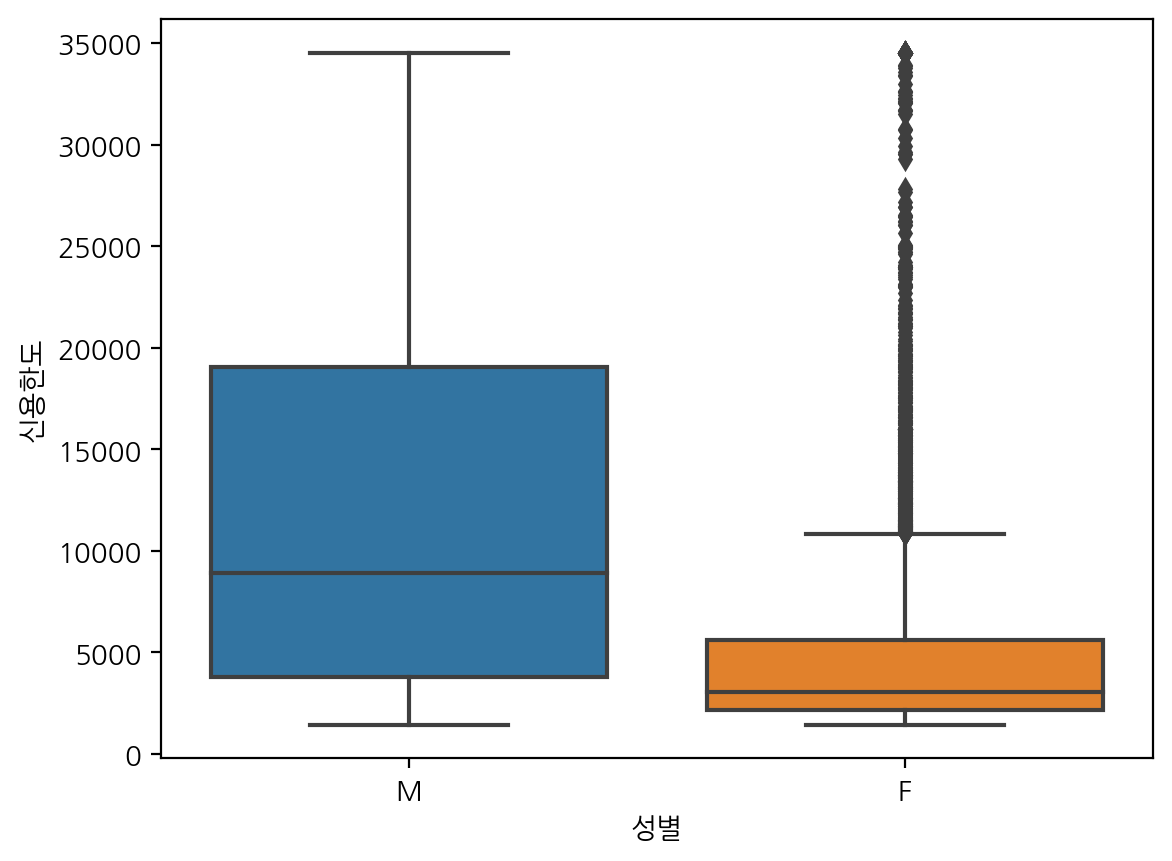

In [54]:
# 성별 별 신용한도 박스플랏
sns.boxplot(x='성별', y='신용한도', data=df)

## 여성 신용한도의 이상치의 개수는? 비율은? 단 0.02%

In [55]:
f_limit = df[df['성별']=='F']['신용한도']

# Z 점수 계산
z_scores = np.abs(stats.zscore(f_limit))

# 이상치 개수 계산
outliers_count = np.sum(z_scores > 3)

# 이상치 비율 계산
outliers_ratio = outliers_count / len(f_limit)

print("여성의 이상치 개수:", outliers_count)
print("여성의 이상치 비율:", outliers_ratio)

여성의 이상치 개수: 134
여성의 이상치 비율: 0.025009331840238895


## 남성의 신용한도 평균보다 높은 신용한도를 가진 여성은?

In [57]:
# 여성 신용한도 데이터프레임 생성
f_limit_df = df[df['성별']=='F']['신용한도'].to_frame() 

# 성별에 따라 신용한도 평균 계산
mean_limit = df.groupby('성별')['신용한도'].mean()

# 남성의 신용한도 평균보다 높은 신용한도를 가진 여성의 비율은? 
f_limit_df['남성의 평균신용한도 이상'] = (f_limit_df['신용한도'] > mean_limit['M']).astype(int)
over_count = (f_limit_df['남성의 평균신용한도 이상'] == 1).sum()
over_mean = over_count/len(f_limit_df)

# 출력
print("남성의 신용한도 평균보다 높은 신용한도를 가진 여성의 인원 수 : ", over_count)
print("남성의 신용한도 평균보다 높은 신용한도를 가진 여성의 비율 : ", over_mean)

남성의 신용한도 평균보다 높은 신용한도를 가진 여성의 인원 수 :  392
남성의 신용한도 평균보다 높은 신용한도를 가진 여성의 비율 :  0.07316162747293767


## 여성의 인구통계학적 요소

### 모든 여성의 인구통계학적 요소

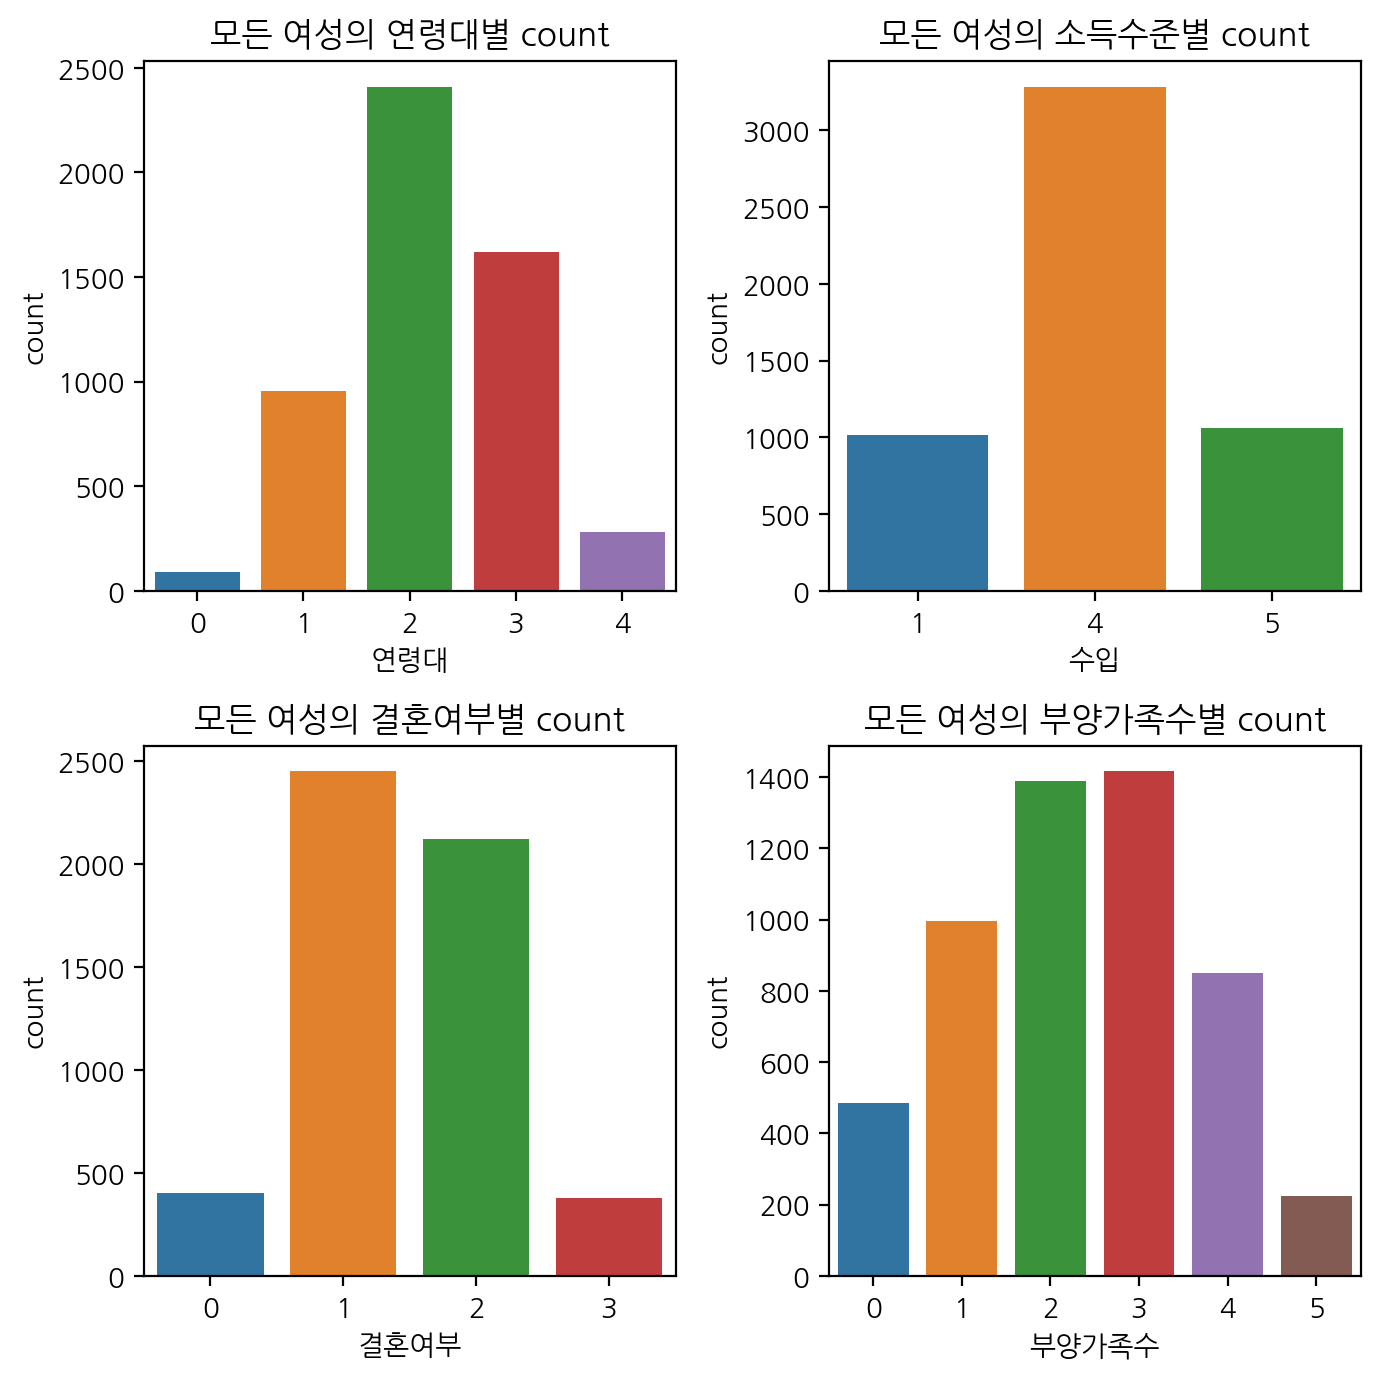

In [69]:
## 그럼 여성 중에 신용한도가 여성 신용한도의 평균 이상은 여성들은 연령대가 어떻게 되지? 소득수준이 어떻게 되지? 결혼여부는? 부양가족수는? 교육수준은?
# 여성 중에서 신용한도가 여성 신용한도의 평균 이상인 행 선택
female_temp = temp[(temp['성별'] == 0)]

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

# 연령대
sns.countplot(data=female_temp, x='연령대', 
            ax=axes[0, 0])
axes[0, 0].set_title('모든 여성의 연령대별 count')

# 소득수준
sns.countplot(data=female_temp, x='수입',  ax=axes[0, 1])
axes[0, 1].set_title('모든 여성의 소득수준별 count')

# 결혼여부
sns.countplot(data=female_temp, x='결혼여부',  ax=axes[1, 0])
axes[1, 0].set_title('모든 여성의 결혼여부별 count')

# 부양가족수
sns.countplot(data=female_temp, x='부양가족수',ax=axes[1, 1])
axes[1, 1].set_title('모든 여성의 부양가족수별 count')

plt.tight_layout()
plt.show()

In [70]:
# ## 그럼 여성 중에 신용한도가 여성 신용한도의 평균 이상은 여성들은 연령대가 어떻게 되지? 소득수준이 어떻게 되지? 결혼여부는? 부양가족수는? 교육수준은?
# # 여성 중에서 신용한도가 여성 신용한도의 평균 이상인 행 선택
# female_temp = temp[(temp['성별'] == 0)]

# # 시각화
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

# # 연령대
# sns.barplot(data=female_temp, x='연령대', y='신용한도',
#             ax=axes[0, 0])
# axes[0, 0].set_title('모든 여성의 연령대별 신용한도')

# # 소득수준
# sns.barplot(data=female_temp, x='수입', y='신용한도', ax=axes[0, 1])
# axes[0, 1].set_title('모든 여성의 소득수준별 신용한도')

# # 결혼여부
# sns.barplot(data=female_temp, x='결혼여부', y='신용한도', ax=axes[1, 0])
# axes[1, 0].set_title('모든 여성의 결혼여부별 신용한도')

# # 부양가족수
# sns.barplot(data=female_temp, x='부양가족수', y='신용한도', ax=axes[1, 1])
# axes[1, 1].set_title('모든 여성의 부양가족수별 신용한도')

# plt.tight_layout()
# plt.show()

### 신용한도 여성 평균 이상 여성의 인구통계학적 요소

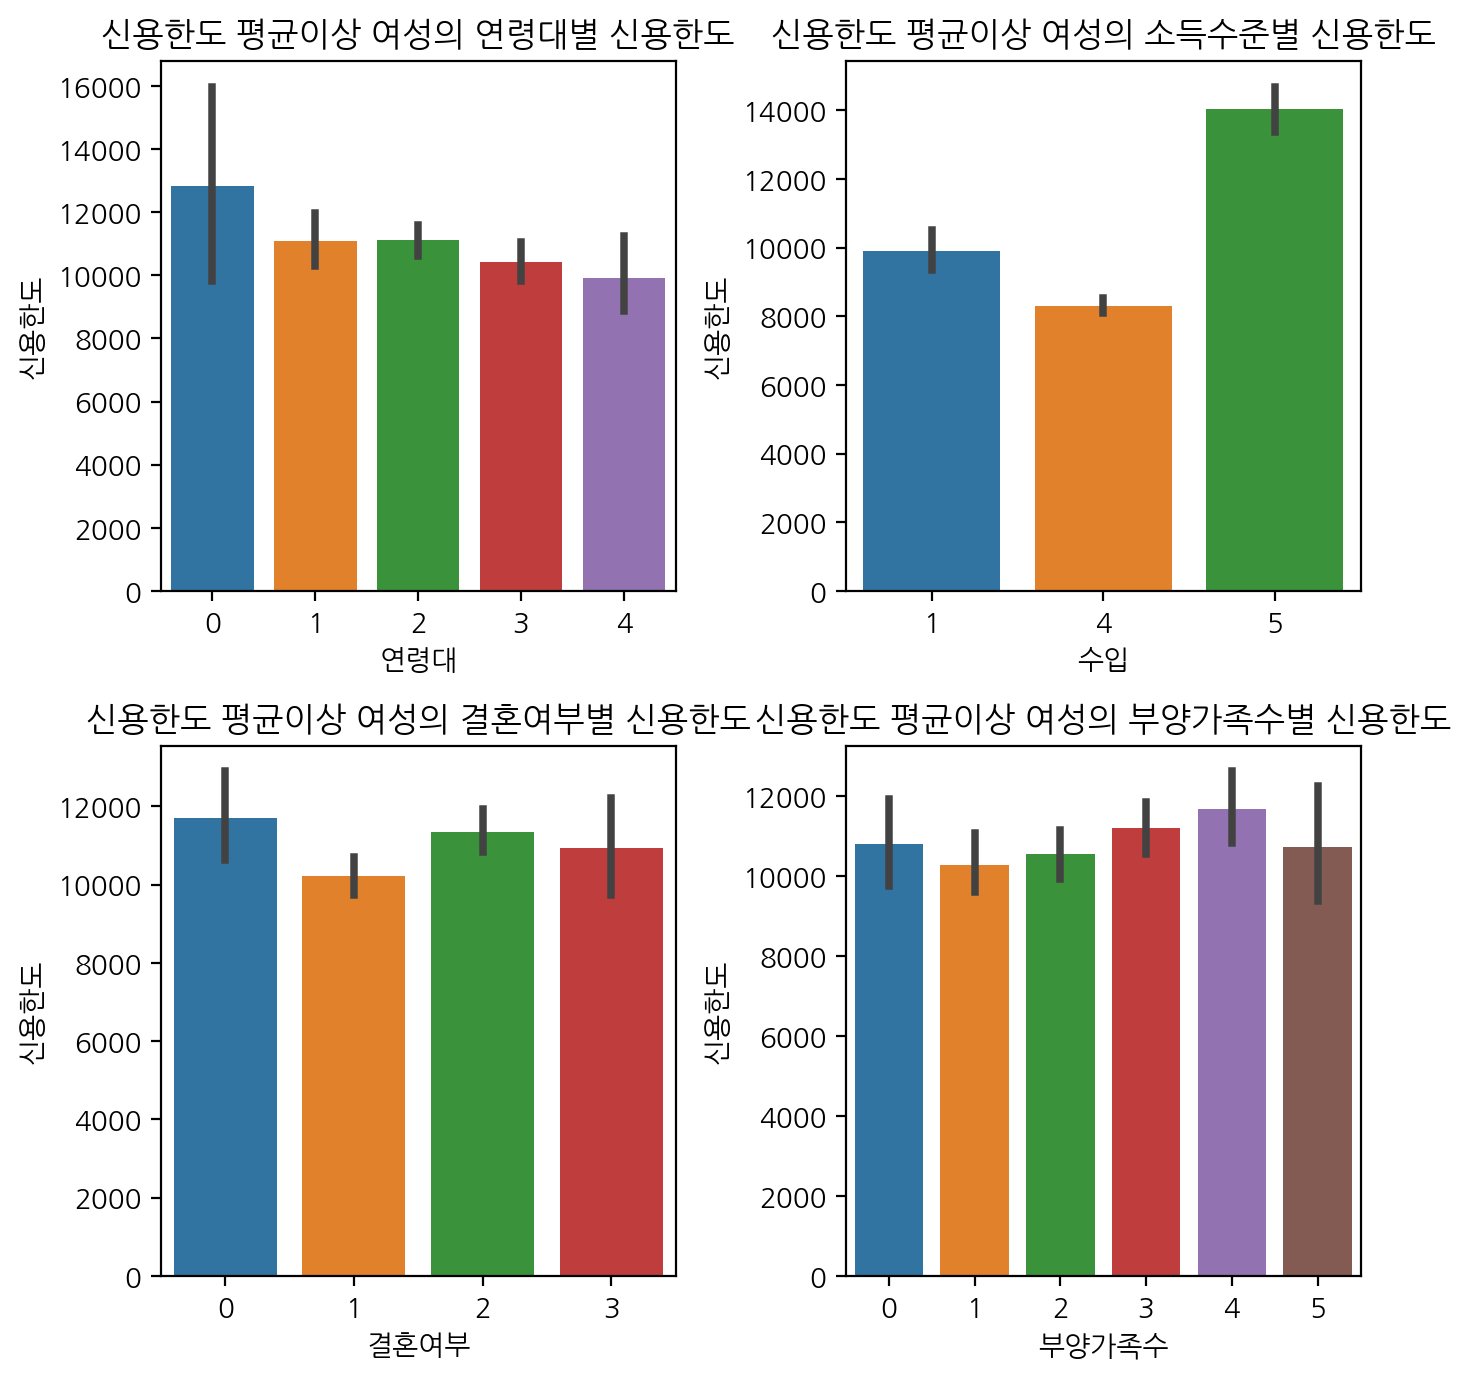

In [71]:
## 그럼 여성 중에 신용한도가 여성 신용한도의 평균 이상은 여성들은 연령대가 어떻게 되지? 소득수준이 어떻게 되지? 결혼여부는? 부양가족수는? 교육수준은?
# 여성 중에서 신용한도가 여성 신용한도의 평균 이상인 행 선택
female_above_female_mean = temp[(temp['성별'] == 0) & (temp['신용한도'] > temp[temp['성별'] == 0]['신용한도'].mean())]

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

# 연령대
sns.barplot(data=female_above_female_mean, x='연령대', y='신용한도', ax=axes[0, 0])
axes[0, 0].set_title('신용한도 평균이상 여성의 연령대별 신용한도')

# 소득수준
sns.barplot(data=female_above_female_mean, x='수입', y='신용한도', ax=axes[0, 1])
axes[0, 1].set_title('신용한도 평균이상 여성의 소득수준별 신용한도')

# 결혼여부
sns.barplot(data=female_above_female_mean, x='결혼여부', y='신용한도', ax=axes[1, 0])
axes[1, 0].set_title('신용한도 평균이상 여성의 결혼여부별 신용한도')

# 부양가족수
sns.barplot(data=female_above_female_mean, x='부양가족수', y='신용한도', ax=axes[1, 1])
axes[1, 1].set_title('신용한도 평균이상 여성의 부양가족수별 신용한도')

plt.tight_layout()
plt.show()

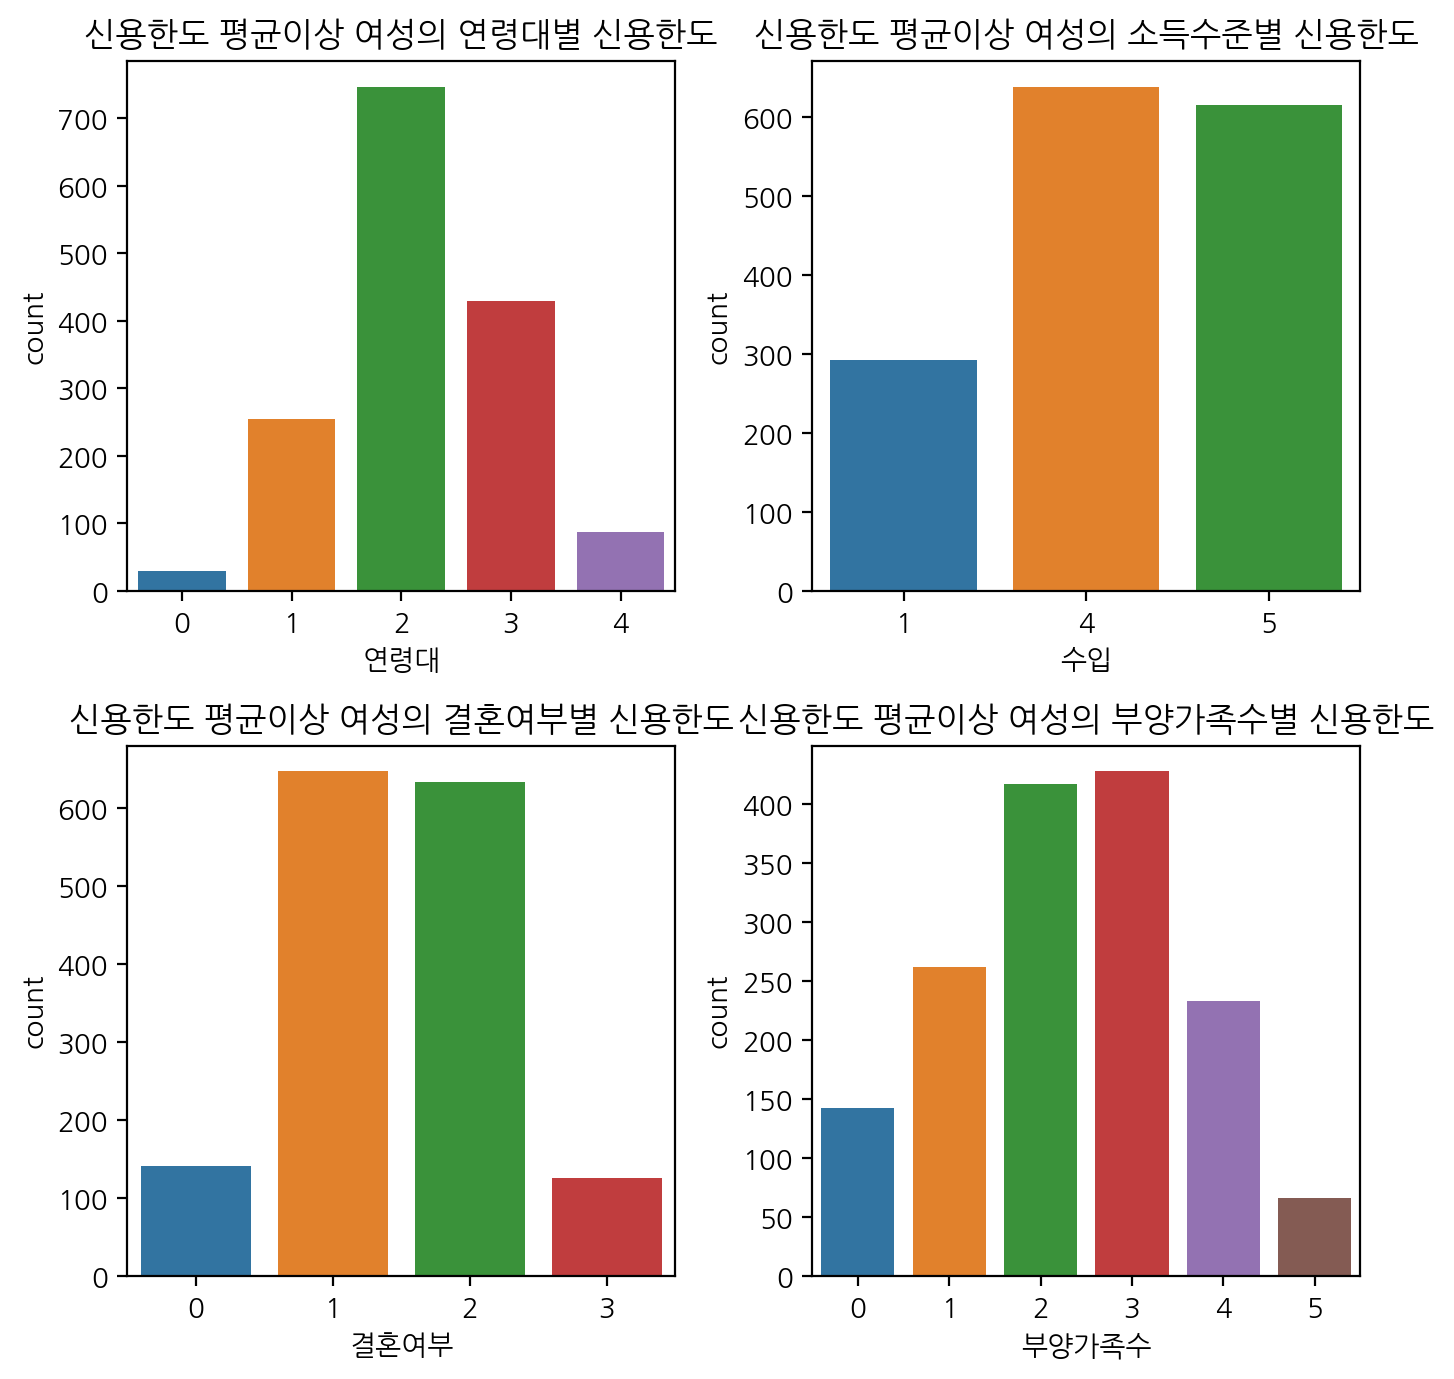

In [74]:
## 그럼 여성 중에 신용한도가 여성 신용한도의 평균 이상은 여성들은 연령대가 어떻게 되지? 소득수준이 어떻게 되지? 결혼여부는? 부양가족수는? 교육수준은?
# 여성 중에서 신용한도가 여성 신용한도의 평균 이상인 행 선택
female_above_female_mean = temp[(temp['성별'] == 0) & (temp['신용한도'] > temp[temp['성별'] == 0]['신용한도'].mean())]

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

# 연령대
sns.countplot(data=female_above_female_mean, x='연령대', ax=axes[0, 0])
axes[0, 0].set_title('신용한도 평균이상 여성의 연령대별 신용한도')

# 소득수준
sns.countplot(data=female_above_female_mean, x='수입', ax=axes[0, 1])
axes[0, 1].set_title('신용한도 평균이상 여성의 소득수준별 신용한도')

# 결혼여부
sns.countplot(data=female_above_female_mean, x='결혼여부', ax=axes[1, 0])
axes[1, 0].set_title('신용한도 평균이상 여성의 결혼여부별 신용한도')

# 부양가족수
sns.countplot(data=female_above_female_mean, x='부양가족수', ax=axes[1, 1])
axes[1, 1].set_title('신용한도 평균이상 여성의 부양가족수별 신용한도')

plt.tight_layout()
plt.show()

- 오히려 20대의 경우가 가장 

In [73]:
# ## 그럼 여성 중에 신용한도가 여성 신용한도의 평균 이상은 여성들은 연령대가 어떻게 되지? 소득수준이 어떻게 되지? 결혼여부는? 부양가족수는? 교육수준은?
# # 여성 중에서 신용한도가 여성 신용한도의 평균 이상인 행 선택
# temp[(temp['성별'] == 0) & (temp['신용한도'] > temp[temp['성별'] == 0]['신용한도'].mean())]

# # 시각화
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# # 연령대
# sns.boxplot(data=female_above_female_mean, x='연령대', y='신용한도',
#             showfliers=False,
#             ax=axes[0, 0])
# axes[0, 0].set_title('연령대별 신용한도')

# # 소득수준
# sns.boxplot(data=female_above_female_mean, x='수입', y='신용한도', showfliers=False, ax=axes[0, 1])
# axes[0, 1].set_title('소득수준별 신용한도')

# # 결혼여부
# sns.boxplot(data=female_above_female_mean, x='결혼여부', y='신용한도', showfliers=False, ax=axes[1, 0])
# axes[1, 0].set_title('결혼여부별 신용한도')

# # 부양가족수
# sns.boxplot(data=female_above_female_mean, x='부양가족수', y='신용한도', showfliers=False, ax=axes[1, 1])
# axes[1, 1].set_title('부양가족수별 신용한도')

# plt.tight_layout()
# plt.show()

## 서비스 지표 확인

In [145]:
# 각자 성별의 신용한도 평균보다 높은 신용한도를 가진 유저 구분
df['성별 별로 평균신용한도 이상'] = ((df['성별'] == 'F') & (df['신용한도'] > mean_limit[0]) |
                                  (df['성별'] == 'M') & (df['신용한도'] > mean_limit[1])).astype(str).replace({'True': 'up', 'False': 'down'})

In [131]:
# 성별에 따라 신용한도 평균 계산
mean_limit = temp.groupby('성별')['신용한도'].mean()

# 각자 성별의 신용한도 평균보다 높은 신용한도를 가진 유저 구분
temp['성별 별로 평균신용한도 이상'] = ((temp['성별'] == 0) & (temp['신용한도'] > mean_limit[0]) |
                                  (temp['성별'] == 1) & (temp['신용한도'] > mean_limit[1])).astype(str).replace({'True': 'up', 'False': 'down'})
temp

,mid,이탈여부,나이,성별,부양가족수,교육수준,결혼여부,수입,카드카테고리,총거래월수,...,신용한도,다음달_이월잔액,평균_사용가능_신용한도,거래금액 변동(1분기_대비_4분기),1년간_거래양,1년간_거래횟수,거래 횟수의 변동량(1분기_대비_4분기),신용 이용률,연령대,성별 별로 평균신용한도 이상
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2,up
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2,up
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3,down
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2,down
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,3,down
10123,710638233,0,41,1,2,6,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,2,down
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,2,up
10125,717406983,0,30,1,2,2,3,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,down


### 여자만

In [133]:
temp_f = temp[temp['성별']==0]
temp_f

,mid,이탈여부,나이,성별,부양가족수,교육수준,결혼여부,수입,카드카테고리,총거래월수,...,신용한도,다음달_이월잔액,평균_사용가능_신용한도,거래금액 변동(1분기_대비_4분기),1년간_거래양,1년간_거래횟수,거래 횟수의 변동량(1분기_대비_4분기),신용 이용률,연령대,성별 별로 평균신용한도 이상
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2,up
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2,down
14,712396908,1,57,0,2,2,1,4,0,48,...,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,3,down
19,709327383,1,45,0,2,2,1,5,0,37,...,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,2,up
21,708508758,0,62,0,0,2,1,4,0,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,4,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,717494358,1,58,0,0,2,2,4,0,48,...,4299.0,1334,2965.0,0.660,15068,123,0.685,0.310,3,down
10119,716893683,0,55,0,3,5,2,5,0,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,3,up
10121,713899383,1,56,0,1,2,2,4,0,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,3,down
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,2,up


In [134]:
pd.crosstab(temp_f['성별 별로 평균신용한도 이상'], df['총거래월수'])

총거래월수,13,14,15,16,17,18,19,20,21,22,...,47,48,49,50,51,52,53,54,55,56
성별 별로 평균신용한도 이상,,,,,,,,,,,,,,,,,,,,,
down,23,4,13,12,15,24,21,28,26,43,...,71,60,55,32,28,23,29,15,17,30
up,16,1,6,3,3,7,7,13,15,12,...,27,22,24,16,11,6,11,7,11,23


<Axes: xlabel='성별', ylabel='총거래월수'>

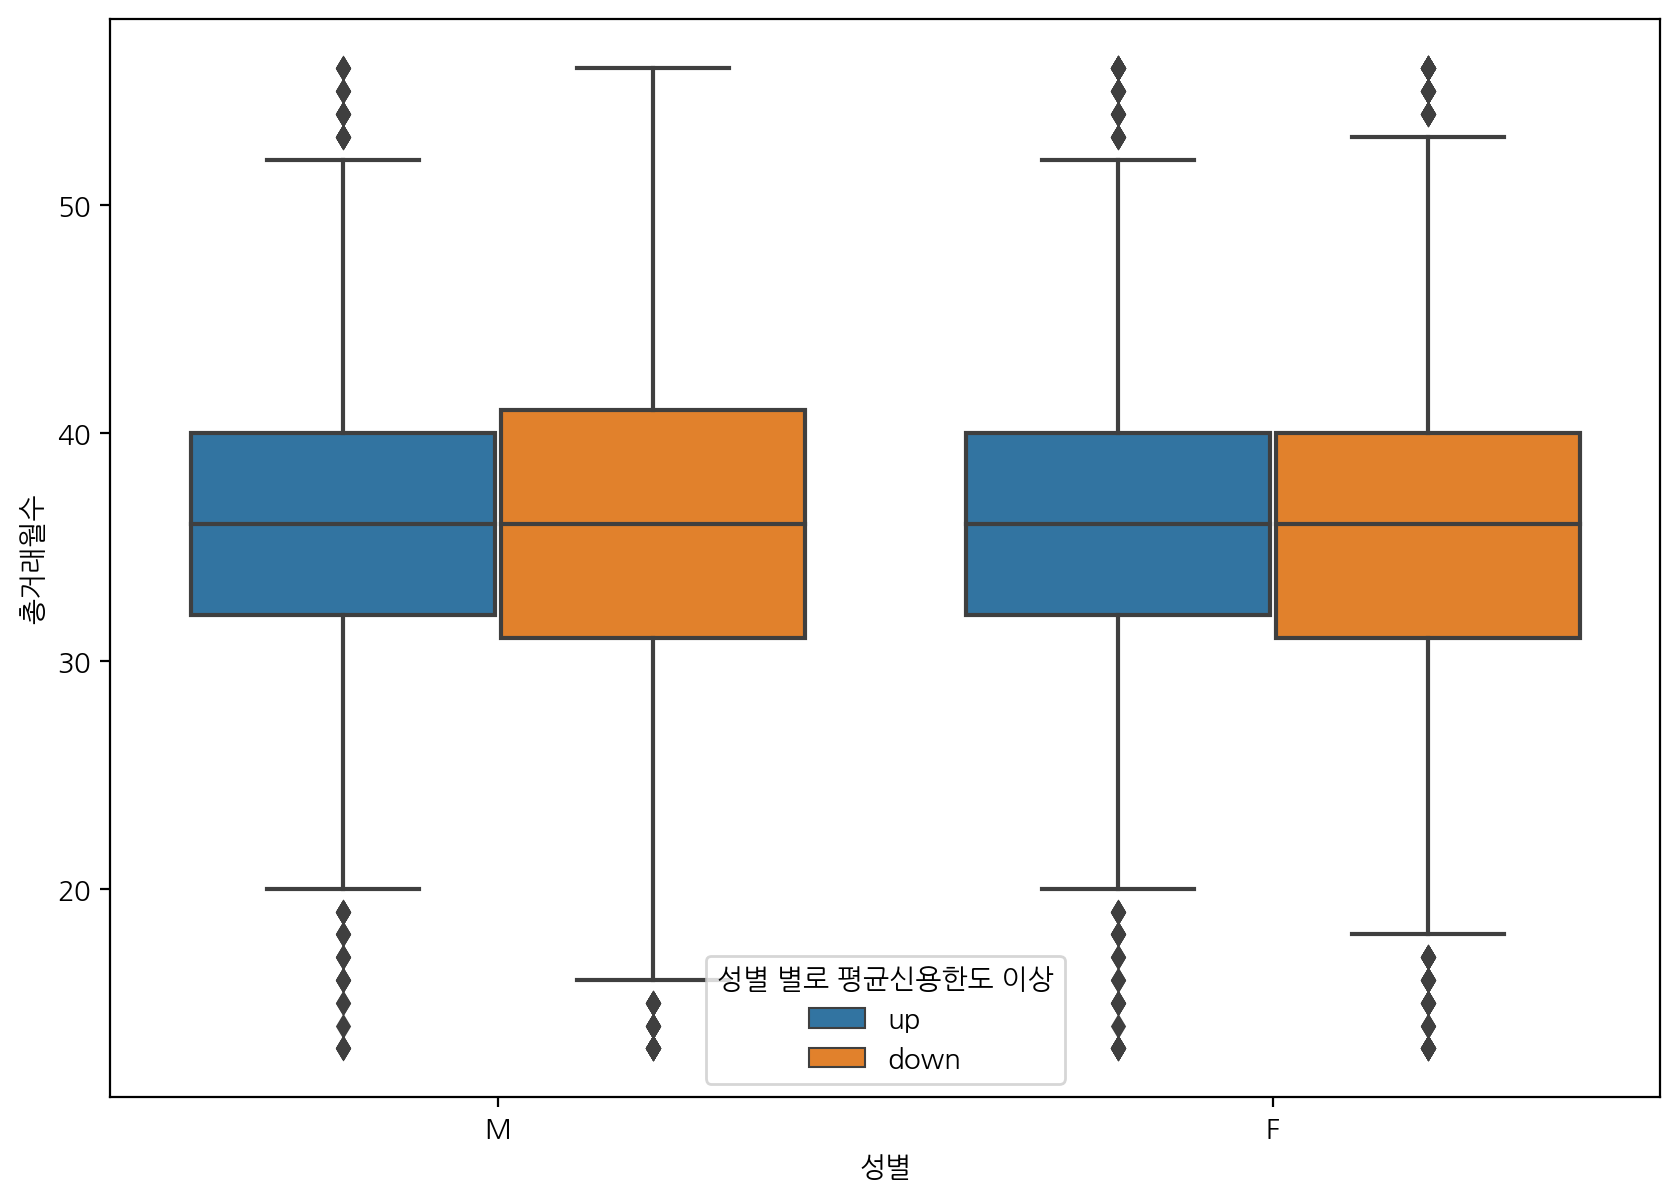

In [165]:
# 총거래월수
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='성별', y='총거래월수', hue='성별 별로 평균신용한도 이상')

In [241]:
income = pd.crosstab(df['성별 별로 평균신용한도 이상'], df['수입'])
income

수입,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
성별 별로 평균신용한도 이상,,,,,,
down,271,1405,944,763,2913,475
up,456,385,458,772,648,637


In [285]:
income_ratio = income.div(income.sum(axis=1), axis=0)
income_ratio = income_ratio.reset_index().T
income_ratio

# 첫 번째 행을 칼럼으로 지정
income_ratio.columns = income_ratio.iloc[0]

# 첫 번째 행 제거
income_ratio = income_ratio[1:]
income_ratio = income_ratio.reset_index()
income_ratio

성별 별로 평균신용한도 이상,수입,down,up
0,$120K +,0.040024,0.135876
1,$40K - $60K,0.207503,0.11472
2,$60K - $80K,0.139418,0.136472
3,$80K - $120K,0.112686,0.230036
4,Less than $40K,0.430217,0.193087
5,Unknown,0.070152,0.189809


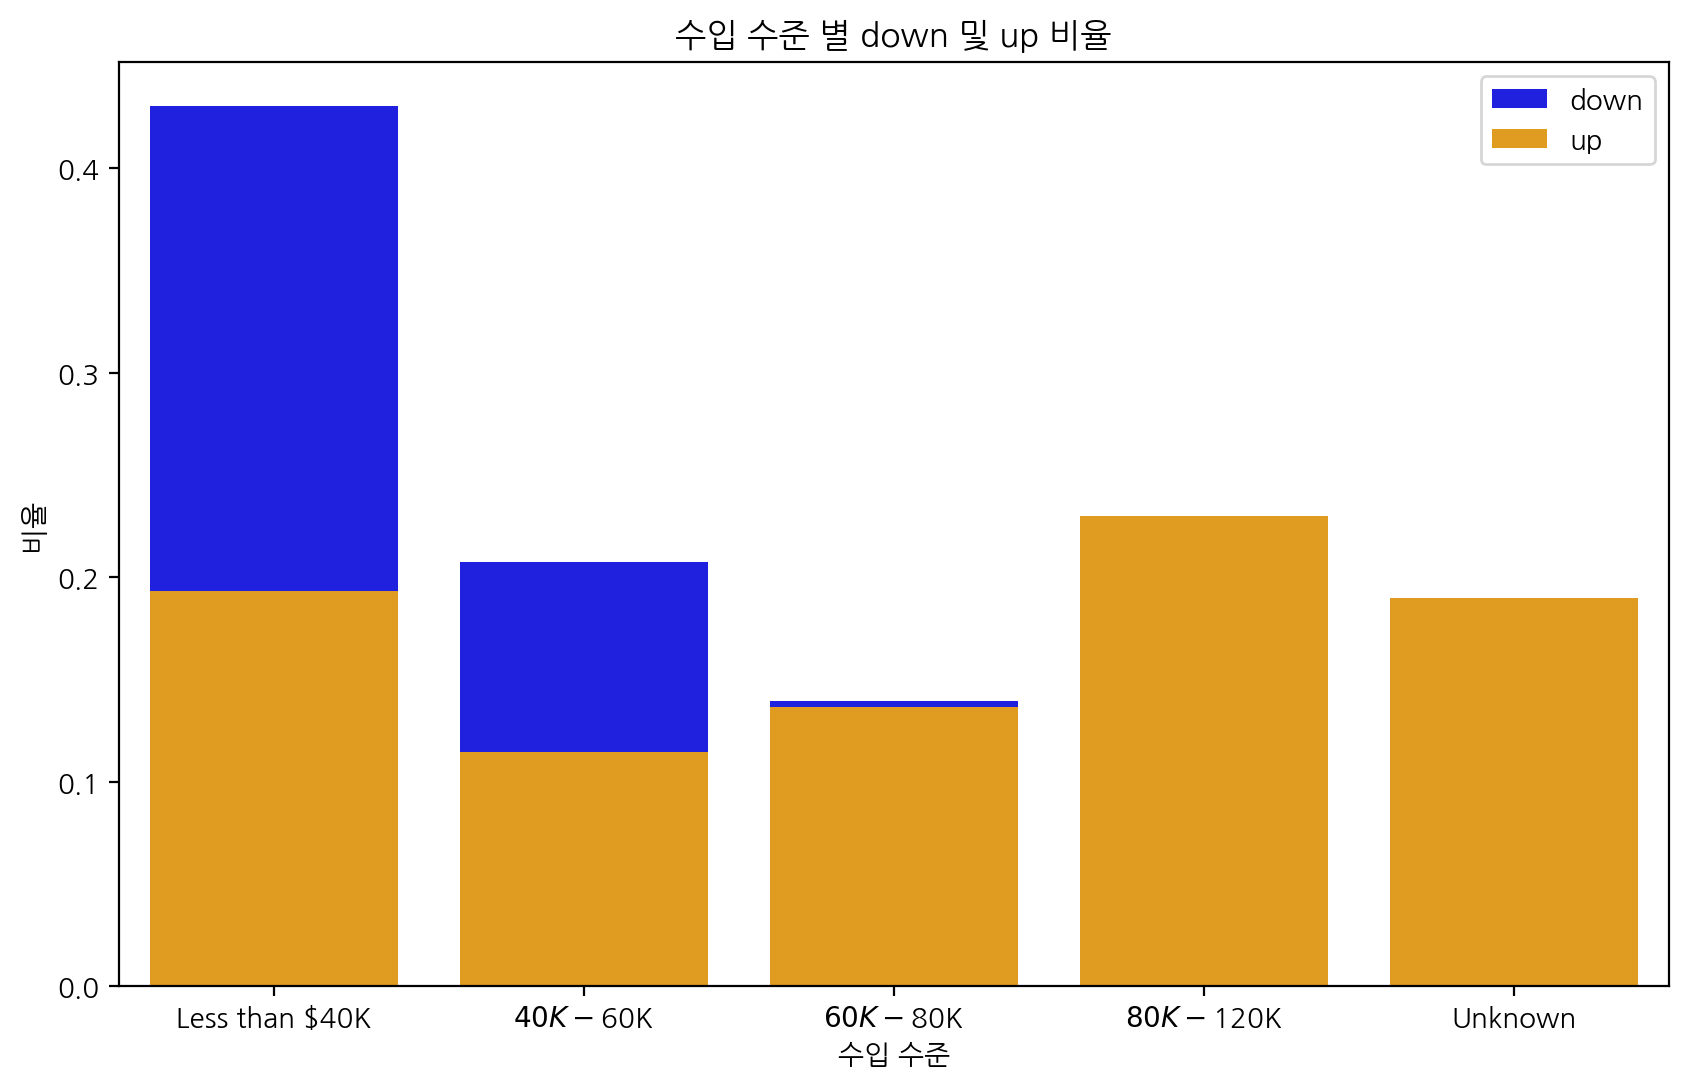

In [287]:
# 수입 수준 별 "down" 및 "up" 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='수입', y='down', data=income_ratio, label='down', color='blue', 
             order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','Unknown'])
sns.barplot(x='수입', y='up', data=income_ratio, label='up', color='orange',
            order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','Unknown'])

plt.xlabel('수입 수준')
plt.ylabel('비율')
plt.title('수입 수준 별 down 및 up 비율')
plt.legend()
plt.show()

# 통계검정

In [189]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mid                     10127 non-null  int64  
 1   이탈여부                    10127 non-null  int64  
 2   나이                      10127 non-null  int64  
 3   성별                      10127 non-null  int64  
 4   부양가족수                   10127 non-null  int64  
 5   교육수준                    10127 non-null  int64  
 6   결혼여부                    10127 non-null  int64  
 7   수입                      10127 non-null  int64  
 8   카드카테고리                  10127 non-null  int64  
 9   총거래월수                   10127 non-null  int64  
 10  상품구매횟수                  10127 non-null  int64  
 11  비활성화_월수                 10127 non-null  int64  
 12  컨택트횟수                   10127 non-null  int64  
 13  신용한도                    10127 non-null  float64
 14  다음달_이월잔액                10127 non-null

In [167]:
df['이탈여부']

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: 이탈여부, Length: 10127, dtype: object

## 이탈여부와 연령대 (범주형 변수 간의 관계)
- 가설 세우기
    - 귀무가설 : 연령대와 이탈유무 두 변수는 독립이다
    - 대립가설 : 연령대와 이탈유무 두 변수는 종속이다.
- 결과 및 해석
    - 카이제곱 검정통계량은 19.831이고, p-value는 0.05이하이다.
    - 따라서 p값이 유의수준 0.05보다 작으므로 귀무가설을 기각할 수 있다.
    - 즉, 연령대와 이탈유무 두 변수는 독립적이지 않고 서로 종속관계에 있다고 말할 수 있다.

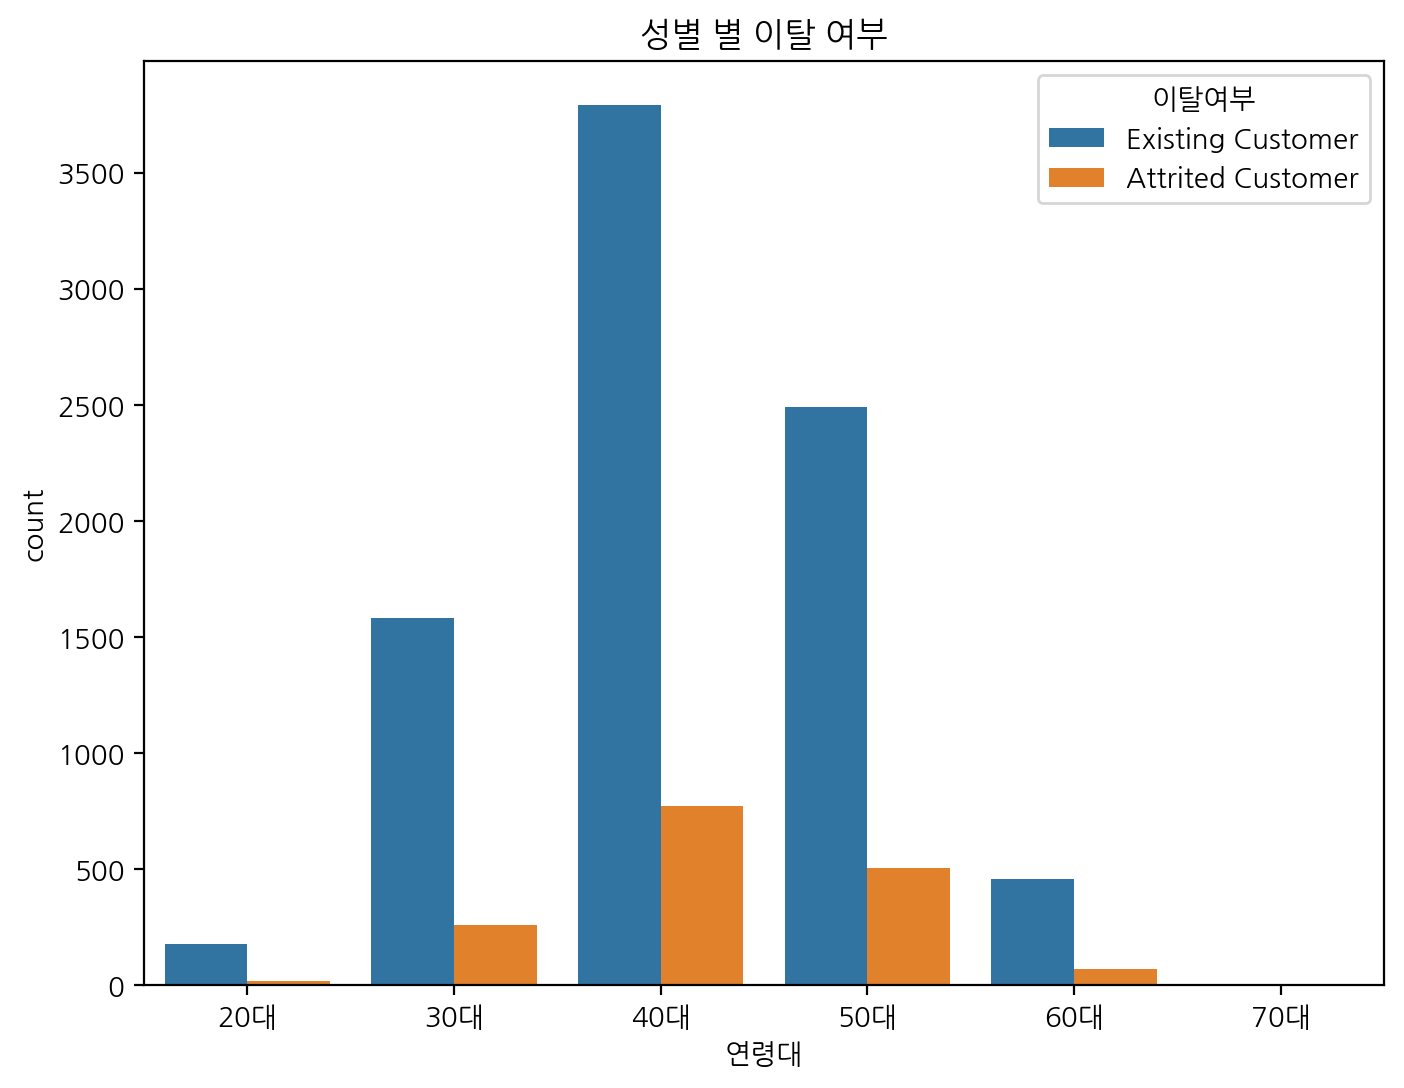

In [185]:
# 성별 별로 이탈 여부를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='연령대', hue='이탈여부', data=df, order = ["20대","30대","40대","50대","60대","70대"])
plt.title('성별 별 이탈 여부')
plt.show()

In [186]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['연령대'], df['이탈여부'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared Statistic: {chi2_stat}, p-value: {p_value}')


Chi-squared Statistic: 19.831176733129116, p-value: 0.0013442425339930553


## 성별과 이탈 (범주형 변수 간의 관계)
- 가설 세우기
    - 귀무가설 : 성별과 이탈유무 두 변수는 독립이다
    - 대립가설 : 성별과 이탈유무 두 변수는 종속이다.
- 결과 및 해석
    - 카이제곱 검정통계량은 13.865이고, p-value는 0.05이하이다.
    - 따라서 p값이 유의수준 0.05보다 작으므로 귀무가설을 기각할 수 있다.
    - 즉, 성별과 이탈관계 두 변수는 독립적이지 않고 서로 종속관계에 있다고 말할 수 있다.

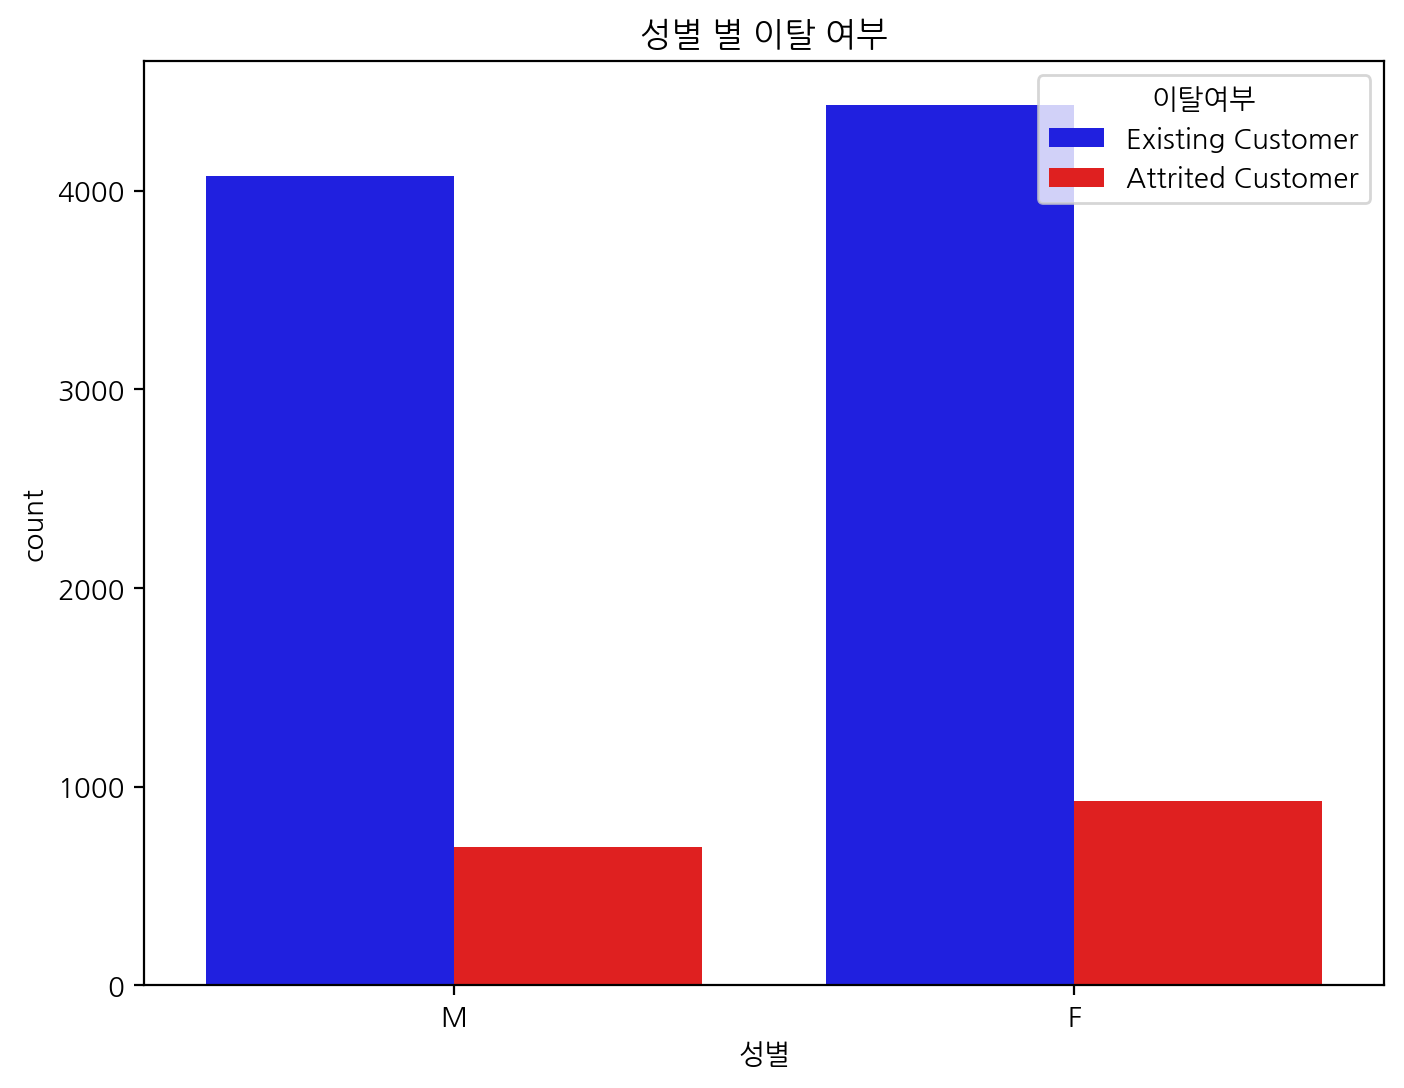

In [181]:
# 성별 별로 이탈 여부를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='성별', hue='이탈여부', data=df, palette={'Attrited Customer': 'red', 'Existing Customer': 'blue'})
plt.title('성별 별 이탈 여부')
plt.show()

In [179]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['성별'], df['이탈여부'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared Statistic: {chi2_stat}, p-value: {p_value}')


Chi-squared Statistic: 13.86561370063734, p-value: 0.00019635846717310307


## 다중 로지스틱 회귀분석
- 여러 독립 변수들을 고려하여 종속 변수에 미치는 영향을 통계적으로 분석할 수 있습니다.
- 로지스틱 회귀는 종속 변수가 이진(binary)인 경우에 사용되며, 독립 변수들은 종속 변수에 대한 로그 오즈 비를 예측하는 데 사용됩니다.

In [208]:
import statsmodels.api as sm
X_train = temp[['성별', '부양가족수', '교육수준',
'결혼여부',
'수입',
"카드카테고리",
"총거래월수",
'상품구매횟수',
'비활성화_월수',
'컨택트횟수',
'신용한도',
'다음달_이월잔액',
'평균_사용가능_신용한도',
'거래금액 변동(1분기_대비_4분기)',
'1년간_거래양',
'1년간_거래횟수',
'거래 횟수의 변동량(1분기_대비_4분기)',
'신용 이용률',
'연령대']]


logreg = sm.Logit(temp['이탈여부'], sm.add_constant(X_train)).fit()
print(logreg.summary())

         Current function value: 0.236012
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   이탈여부   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10107
Method:                           MLE   Df Model:                           19
Date:                Thu, 21 Dec 2023   Pseudo R-squ.:                  0.4645
Time:                        16:40:25   Log-Likelihood:                -2390.1
converged:                      False   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.1197      0.359    -14.245      0.000      -5.824      -4.415
성별                         0.

/Users/tiffany/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- Pseudo R-squared :  모델의 설명력
    - 0과 1 사이의 값을 가집니다. 
    - 여기서는 약 0.4645로 나타났습니다. 
    - 이는 종속 변수의 분산을 얼마나 설명하는지를 나타냅니다.
- Coefficient (coef) : 각 독립 변수에 대한 회귀 계수
    - Coefficient의 부호는 해당 변수와 종속 변수 간의 방향성을 나타냅니다. 
    - 양수일 경우 종속 변수의 값이 증가할 때 해당 독립 변수의 값도 증가한다는 의미이며, 음수일 경우는 감소한다는 의미입니다.
    - 회귀 계수의 크기는 해당 독립 변수의 영향의 강도를 나타냅니다.
- P-value (P>|z|): P-value는 해당 독립 변수의 회귀 계수가 통계적으로 유의미한지 여부
    - P-value가 작을수록 해당 독립 변수는 통계적으로 유의미한 영향을 미칩니다. 
    - 일반적으로 0.05보다 작으면 유의미하다고 간주됩니다.
    - 해석 예:
        - 성별의 경우, 회귀 계수는 0.6646로 양수이며, P-value는 0.000으로 매우 작습니다. 따라서 성별은 이탈 여부에 통계적으로 유의미한 영향을 미칩니다.
        - 부양가족수의 경우, 회귀 계수는 -0.1417로 음수이며, P-value는 0.000으로 매우 작습니다. 따라서 부양가족수도 이탈 여부에 통계적으로 유의미한 영향을 미칩니다.
        - 교육수준과 수입의 경우 P-value가 0.05보다 크므로 통계적으로 유의미하지 않을 가능성이 있습니다.

In [193]:
# odds ratio 구하는 부분
odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{odds[i] : .3f}배 증가한다.\n')


변수 성별의 logit : -5.120
변수 성별가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-5.120배 증가한다.
변수 성별의 odds ratio :  0.006
변수 성별가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.006배 증가한다.

변수 부양가족수의 logit :  0.665
변수 부양가족수가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.665배 증가한다.
변수 부양가족수의 odds ratio :  1.944
변수 부양가족수가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.944배 증가한다.

변수 교육수준의 logit : -0.142
변수 교육수준가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.142배 증가한다.
변수 교육수준의 odds ratio :  0.868
변수 교육수준가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.868배 증가한다.

변수 결혼여부의 logit : -0.017
변수 결혼여부가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.017배 증가한다.
변수 결혼여부의 odds ratio :  0.983
변수 결혼여부가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.983배 증가한다.

변수 수입의 logit : -0.245
변수 수입가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.245배 증가한다.
변수 수입의 odds ratio :  0.783
변수 수입가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.783배 증가한다.

변수 카드카테고리의 logit :  0.002
변수 카드카테고리가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.002배 

IndexError: index 19 is out of bounds for axis 0 with size 19

In [195]:
sig_level = .05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
print(logistic_variable)

                           logit  odds ratio  p-value above 5.0%
const                  -5.119692    0.005978   0.0000        Yes
성별                      0.664577    1.943667   0.0000        Yes
부양가족수                  -0.141719    0.867865   0.0000        Yes
교육수준                   -0.016735    0.983404   0.4144         No
결혼여부                   -0.244964    0.782733   0.0000        Yes
수입                      0.001984    1.001986   0.9468         No
카드카테고리                 -0.097792    0.906838   0.1146         No
총거래월수                   0.013548    1.013640   0.0516         No
상품구매횟수                  0.450344    1.568852   0.0000        Yes
비활성화_월수                -0.506945    0.602333   0.0000        Yes
컨택트횟수                  -0.506406    0.602658   0.0000        Yes
신용한도                   -0.000930    0.999071   1.0000         No
다음달_이월잔액                0.001880    1.001882   1.0000         No
평균_사용가능_신용한도            0.000933    1.000934   1.0000         No
거래금액 변동(1분기_대비_4분기)     0

          Predicted 0  Predicted 1
Actual 0        945.0        682.0
Actual 1        285.0       8215.0


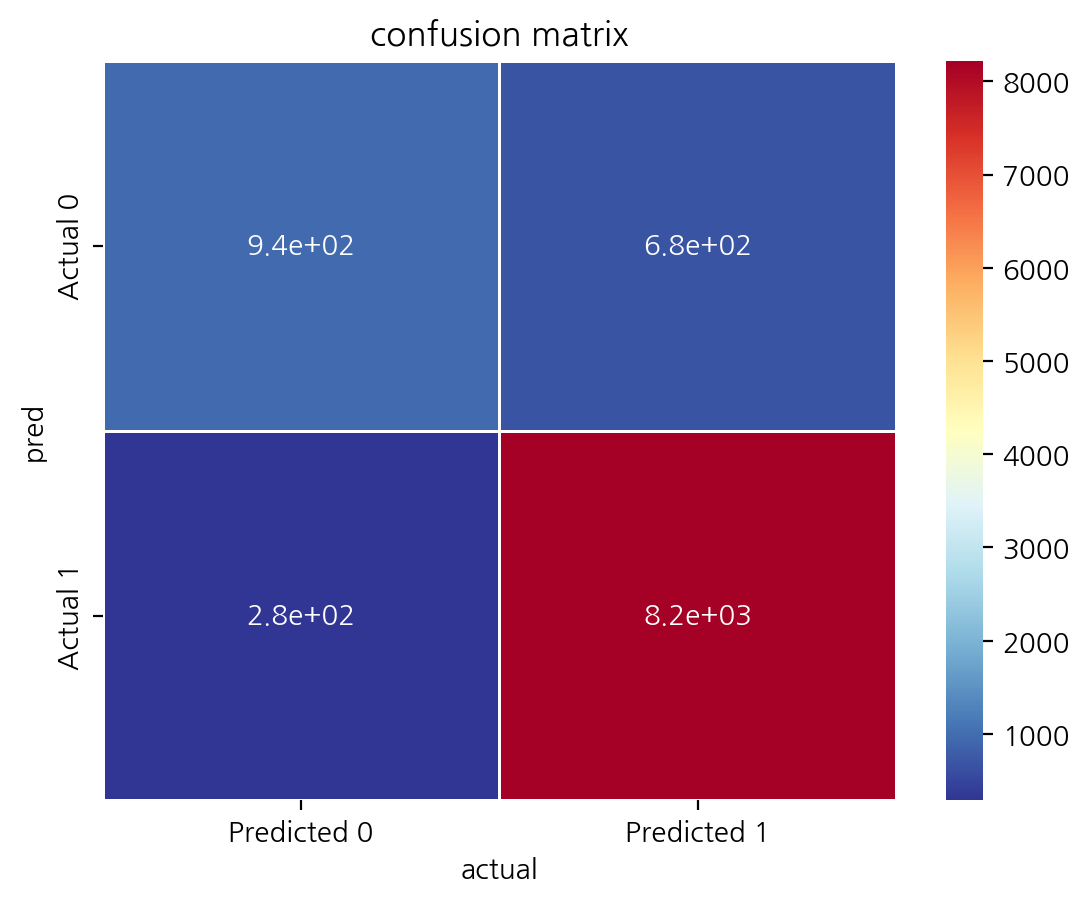

In [197]:
# 혼동행렬
# 혼동행렬 (confusion matrix)
cm_df = pd.DataFrame(logreg.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
print(cm_df)

sns.heatmap(cm_df, cmap = 'RdYlBu_r', annot = True, annot_kws={"size": 10}, linewidths=.5)
plt.title('confusion matrix')
plt.xlabel('actual')
plt.ylabel('pred')
plt.show()


In [203]:
cm_df = pd.DataFrame(logreg.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
cm_df


,Predicted 0,Predicted 1
Actual 0,945.0,682.0
Actual 1,285.0,8215.0


In [204]:
y_pred = logreg.predict(X_train)

ValueError: shapes (10127,19) and (20,) not aligned: 19 (dim 1) != 20 (dim 0)

In [199]:
ax = sns.countplot(x=df['pred'], hue=df['actual'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_title('로지스틱 회귀분석 결과와 실제값')
plt.show()


KeyError: 'pred'